In [211]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA


In [212]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [213]:
data = pd.read_csv('train.csv')
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [215]:
data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [216]:
#Finding columns with max value as 0
data.max()

id                          69998
circle_id                     109
loc_og_t2o_mou                0.0
std_og_t2o_mou                0.0
loc_ic_t2o_mou                0.0
last_date_of_month_6    6/30/2014
arpu_6                  27731.088
arpu_7                  35145.834
arpu_8                  33543.624
onnet_mou_6               7376.71
onnet_mou_7               8157.78
onnet_mou_8              10752.56
offnet_mou_6              8362.36
offnet_mou_7              7043.98
offnet_mou_8             14007.34
roam_ic_mou_6             2850.98
roam_ic_mou_7             4155.83
roam_ic_mou_8             4169.81
roam_og_mou_6             3775.11
roam_og_mou_7             2812.04
roam_og_mou_8             5337.04
loc_og_t2t_mou_6          6431.33
loc_og_t2t_mou_7          7400.66
loc_og_t2t_mou_8         10752.56
loc_og_t2m_mou_6          4696.83
loc_og_t2m_mou_7          4557.14
loc_og_t2m_mou_8          4961.33
loc_og_t2f_mou_6           617.58
loc_og_t2f_mou_7           815.33
loc_og_t2f_mou

In [217]:
100 * data.isnull().sum()/ len(data)

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

In [218]:
data.select_dtypes(include='object')

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014
...,...,...,...,...,...,...,...,...,...
69994,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/31/2014,8/31/2014,NaN,7/31/2014,8/21/2014
69995,6/30/2014,7/31/2014,8/31/2014,6/28/2014,7/31/2014,8/27/2014,NaN,NaN,NaN
69996,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/30/2014,8/29/2014,NaN,NaN,NaN
69997,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/19/2014,8/26/2014,6/17/2014,7/13/2014,8/14/2014


In [219]:
## In churn prediction, we assume that there are three phases of customer lifecycle :
# The ‘good’ phase Month 6
# The ‘action’ phase Month 8
# The ‘churn’ phase Month 9

In [220]:
#imputing the values in below column
data['last_date_of_month_6'] = '6/30/2014'
data['last_date_of_month_7'] = '7/31/2014'
data['loc_og_t2o_mou'] = 0
data['std_og_t2o_mou'] = 0
data['loc_ic_t2o_mou'] = 0


In [221]:
## Impute onnet, offnet, roam_og, loc_og, std_og, isd_og, spl_og, og_others as 0 as total_og_mou is 0 for customer
og_data_columns_to_update = ['onnet_mou_6', 'onnet_mou_7', \
                             'offnet_mou_6', 'offnet_mou_7', \
                             'roam_og_mou_6', 'roam_og_mou_7', \
                             'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', \
                             'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', \
                             'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', \
                             'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', \
                             'loc_og_mou_6', 'loc_og_mou_7', \
                             'std_og_t2t_mou_6', 'std_og_t2t_mou_7', \
                             'std_og_t2m_mou_6', 'std_og_t2m_mou_7', \
                             'std_og_t2f_mou_6', 'std_og_t2f_mou_7', \
                             'std_og_t2c_mou_6', 'std_og_t2c_mou_7', \
                             'std_og_mou_6', 'std_og_mou_7', \
                             'isd_og_mou_6', 'isd_og_mou_7', \
                             'spl_og_mou_6', 'spl_og_mou_7', \
                             'og_others_6', 'og_others_7']
data[og_data_columns_to_update] = data[og_data_columns_to_update].fillna(0)
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,

In [222]:
## Impute roam_ic, loc_ic, std_ic, spl_ic, isd_ic, ic_others as 0 as total_ic_mou is 0 for customer
ic_data_columns_to_update = ['roam_ic_mou_6', 'roam_ic_mou_7', \
                             'loc_ic_mou_6', 'loc_ic_mou_7', \
                             'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', \
                             'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', \
                             'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', \
                             'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', \
                             'std_ic_mou_6', 'std_ic_mou_7', \
                             'spl_ic_mou_6', 'spl_ic_mou_7', \
                             'isd_ic_mou_6', 'isd_ic_mou_7', \
                             'ic_others_6', 'ic_others_7', \
                             'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',\
                             'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',\
                             'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7']
data[ic_data_columns_to_update] = data[ic_data_columns_to_update].fillna(0)
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,

In [223]:
## Fill null values for data pack recharge amount and count to 0 
## 'total_rech_data_6', 'total_rech_data_7', 'max_rech_data_6', 'max_rech_data_7', 
## 'count_rech_2g_6', 'count_rech_2g_7', 
## 'count_rech_3g_6', 'count_rech_3g_7', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
data_recharge_columns_to_update = ['total_rech_data_6', 'total_rech_data_7',\
                                   'max_rech_data_6', 'max_rech_data_7', \
                                   'count_rech_2g_6', 'count_rech_2g_7', \
                                   'count_rech_3g_6', 'count_rech_3g_7', \
                                   'av_rech_amt_data_6', 'av_rech_amt_data_7']
data[data_recharge_columns_to_update] = data[data_recharge_columns_to_update].fillna(0)
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,0.0,1.0,NaN,0.0,145.0,NaN,0.0,0.0,NaN,0.0,1.0,NaN,0.0,145.0,NaN,

In [224]:
# checking null values check again in data set
100 * data.isnull().sum()/ len(data)

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.000000
std_og_t2o_mou               0.000000
loc_ic_t2o_mou               0.000000
last_date_of_month_6         0.000000
last_date_of_month_7         0.000000
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  0.000000
onnet_mou_7                  0.000000
onnet_mou_8                  5.290076
offnet_mou_6                 0.000000
offnet_mou_7                 0.000000
offnet_mou_8                 5.290076
roam_ic_mou_6                0.000000
roam_ic_mou_7                0.000000
roam_ic_mou_8                5.290076
roam_og_mou_6                0.000000
roam_og_mou_7                0.000000
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             0.000000
loc_og_t2t_mou_7             0.000000
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

In [225]:
# derived the total_data_rech_amt_6 and total_data_rech_amt_7 column thorugh average recharge data and average recharge
# of amount and data column
data['total_data_rech_amt_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6']
data['total_data_rech_amt_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']
data.head(5)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7
0,0,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0,0.0,0.0
1,1,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,0.0,1.0,NaN,

In [226]:
#derived the total rechage column for month 6 and 7
data['total_rech_6'] = data['total_data_rech_amt_6'] + data['total_rech_amt_6']
data['total_rech_7'] = data['total_data_rech_amt_7'] + data['total_rech_amt_7']
data.head(10)


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_rech_6,total_rech_7
0,0,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.00,0.00,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.00,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0,0.0,0.0,77.0,65.0
1,1,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7

In [227]:
# Mean value of recharge amount for June
round(data['total_rech_6'].mean(), 2)


476.62

In [228]:
# 70th Percentile of total recharge amount for June
data['total_rech_6'].quantile(0.7)

476.0

In [229]:
# Getting high value customers
len(data[(data['total_rech_6']>=data['total_rech_6'].quantile(0.7))])

21157

In [230]:
## Filtering based on 0.7 quantile
high_value_customer = data[(data['total_rech_6'] >= data['total_rech_6'].quantile(0.7))]
high_value_customer.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_rech_6,total_rech_7
4,4,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.0,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.0,0.00,0.00,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,13,10,8,290,136,122,50,41,30,6/25/2014,7/26/2014,8/30/2014,25,10,30,6/25/2014,7/23/2014,8/20/2014,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,390.80,308.89,213.47,0.00,0.0,0.0,0.00,35.0,0.0,0.00,35.12,0.0,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.00,0.0,0.00,0,1225.0,1337.0,1515.0,1473.0
10,10,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,445.826,18.310,24.690,16.54,0.00,0.00,104.81,8.16,2.36,18.56,0.0,0.0,20.30,0.0,0.0,16.54,0.00,0.00,47.36,1.44,0.00,25.98,0.00,0.00,0.00,0.00,0.0,89.89,1.44,0.00,0.00,0.00,0.00,11.16,6.71,2.36,0.0,0.0,0.00,0.0,0.0,0.0,11.16,6.71,2.36,0.0,0.0,0.0,0.00,0.0,0.78,0.00,0.0,0.0,101.06,8.16,3.14,17.44,0.00,8.58,111.46,2.28,8.68,11.78,0.00,0.05,140.69,2.28,17.31,0.00,0.00,0.00,444.79,62.24,0.00,0.0,1.53,0.00,0.0,0.0,0.0,444.79,63.78,0.00,585.49,66.06,17.31,0.00,0.0,0.0,0.0,0.0,0.

In [231]:
high_value_customer['Churn'] = 0

In [232]:
#setting the high_value_customer_df['Churn'] column based on outgoing mou and incoming mou, volumne of 2g/3g 
high_value_customer['Churn'] = high_value_customer.index.isin(high_value_customer[(high_value_customer.total_og_mou_8 != 0) | (high_value_customer.total_ic_mou_8 != 0) | (high_value_customer.vol_2g_mb_8 != 0) | (high_value_customer.vol_3g_mb_8 != 0)].index)
high_value_customer.Churn = high_value_customer.Churn.apply(lambda x: 1 if x==False else 0)

high_value_customer.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_rech_6,total_rech_7,Churn
4,4,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.0,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.0,0.00,0.00,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,13,10,8,290,136,122,50,41,30,6/25/2014,7/26/2014,8/30/2014,25,10,30,6/25/2014,7/23/2014,8/20/2014,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,390.80,308.89,213.47,0.00,0.0,0.0,0.00,35.0,0.0,0.00,35.12,0.0,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.00,0.0,0.00,0,1225.0,1337.0,1515.0,1473.0,0
10,10,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,445.826,18.310,24.690,16.54,0.00,0.00,104.81,8.16,2.36,18.56,0.0,0.0,20.30,0.0,0.0,16.54,0.00,0.00,47.36,1.44,0.00,25.98,0.00,0.00,0.00,0.00,0.0,89.89,1.44,0.00,0.00,0.00,0.00,11.16,6.71,2.36,0.0,0.0,0.00,0.0,0.0,0.0,11.16,6.71,2.36,0.0,0.0,0.0,0.00,0.0,0.78,0.00,0.0,0.0,101.06,8.16,3.14,17.44,0.00,8.58,111.46,2.28,8.68,11.78,0.00,0.05,140.69,2.28,17.31,0.00,0.00,0.00,444.79,62.24,0.00,0.0,1.53,0.00,0.0,0.0,0.0,444.79,63.78,0.00,585.49,66.06,17.31,0.00,0.0,0.0,0.

In [233]:
#detail of high value customer for Aug month
high_value_customer[['total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8','Churn']]

,total_ic_mou_8,total_og_mou_8,vol_2g_mb_8,vol_3g_mb_8,Churn
4,28.31,15.76,213.47,0.00,0
10,17.31,3.14,0.00,0.00,0
12,26.99,687.41,0.00,0.00,0
14,369.53,227.41,0.00,0.00,0
15,629.94,391.53,354.35,0.00,0
...,...,...,...,...,...
69981,551.36,1099.61,0.00,0.00,0
69984,318.86,915.38,0.00,0.00,0
69993,7.55,0.00,0.00,0.00,0
69996,414.54,342.29,0.00,0.00,0


In [234]:
high_value_customer.shape

(21157, 177)

In [235]:
## Columns
list(high_value_customer.columns)


['id',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 

In [236]:
columnslist = ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', \
               'last_date_of_month_6', 'last_date_of_month_7', \
               'arpu_6', 'arpu_7', \
               'onnet_mou_6', 'onnet_mou_7', \
               'offnet_mou_6', 'offnet_mou_7', \
               'roam_ic_mou_6', 'roam_ic_mou_7', \
               'roam_og_mou_6', 'roam_og_mou_7', \
               'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', \
               'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', \
               'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', \
               'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', \
               'loc_og_mou_6', 'loc_og_mou_7', \
               'std_og_t2t_mou_6', 'std_og_t2t_mou_7', \
               'std_og_t2m_mou_6', 'std_og_t2m_mou_7', \
               'std_og_t2f_mou_6', 'std_og_t2f_mou_7', \
               'std_og_t2c_mou_6', 'std_og_t2c_mou_7', \
               'std_og_mou_6', 'std_og_mou_7', \
               'isd_og_mou_6', 'isd_og_mou_7', \
               'spl_og_mou_6', 'spl_og_mou_7', \
               'og_others_6', 'og_others_7', \
               'total_og_mou_6', 'total_og_mou_7', \
               'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', \
               'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', \
               'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', \
               'loc_ic_mou_6', 'loc_ic_mou_7', \
               'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', \
               'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', \
               'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', \
               'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', \
               'std_ic_mou_6', 'std_ic_mou_7', \
               'total_ic_mou_6', 'total_ic_mou_7', \
               'spl_ic_mou_6', 'spl_ic_mou_7', \
               'isd_ic_mou_6', 'isd_ic_mou_7', \
               'ic_others_6', 'ic_others_7', \
               'total_rech_num_6', 'total_rech_num_7', \
               'total_rech_amt_6', 'total_rech_amt_7', \
               'max_rech_amt_6', 'max_rech_amt_7', \
               'date_of_last_rech_6', 'date_of_last_rech_7', \
               'last_day_rch_amt_6', 'last_day_rch_amt_7', \
               'date_of_last_rech_data_6', 'date_of_last_rech_data_7', \
               'total_rech_data_6', 'total_rech_data_7', \
               'max_rech_data_6', 'max_rech_data_7', \
               'count_rech_2g_6', 'count_rech_2g_7', \
               'count_rech_3g_6', 'count_rech_3g_7', \
               'av_rech_amt_data_6', 'av_rech_amt_data_7', \
               'vol_2g_mb_6', 'vol_2g_mb_7', \
               'vol_3g_mb_6', 'vol_3g_mb_7', \
               'arpu_3g_6', 'arpu_3g_7', \
               'arpu_2g_6', 'arpu_2g_7', \
               'night_pck_user_6', 'night_pck_user_7', \
               'monthly_2g_6', 'monthly_2g_7', \
               'sachet_2g_6', 'sachet_2g_7', \
               'monthly_3g_6', 'monthly_3g_7', \
               'sachet_3g_6', 'sachet_3g_7', \
               'fb_user_6', 'fb_user_7', \
               'aon', 'jul_vbc_3g', 'jun_vbc_3g', \
               'total_data_rech_amt_6', 'total_data_rech_amt_7', \
               'total_rech_6', 'total_rech_7', 'Churn']
high_value_customer_df = high_value_customer[columnslist]
high_value_customer_df.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,date_of_last_rech_6,date_of_last_rech_7,last_day_rch_amt_6,last_day_rch_amt_7,date_of_last_rech_data_6,date_of_last_rech_data_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,fb_user_6,fb_user_7,aon,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_rech_6,total_rech_7,Churn
4,109,0,0,0,6/30/2014,7/31/2014,240.708,128.191,21.28,4.83,56.99,38.11,53.64,0.0,15.73,0.0,10.16,4.83,36.74,19.88,11.99,1.23,0.00,9.85,58.91,25.94,0.00,0.00,4.35,0.00,0.0,0.0,0.0,0.0,4.35,0.00,0.0,0.0,0.00,17.0,0.00,0.0,63.26,42.94,5.44,1.39,10.58,4.33,5.51,3.63,21.54,9.36,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,21.54,9.36,0.00,0.0,0.0,0.0,0.00,0.00,13,10,290,136,50,41,6/25/2014,7/26/2014,25,10,6/25/2014,7/23/2014,7.0,7.0,25.0,41.0,7.0,6.0,0.0,1.0,175.0,191.0,390.80,308.89,0.00,0.0,0.00,35.0,0.00,35.12,0.0,0.0,0,0,7,6,0,0,0,1,1.0,1.0,647,0.0,0.00,1225.0,1337.0,1515.0,1473.0,0
10,109,0,0,0,6/30/2014,7/31/2014,445.826,18.310,16.54,0.00,104.81,8.16,18.56,0.0,20.30,0.0,16.54,0.00,47.36,1.44,25.98,0.00,0.00,0.00,89.89,1.44,0.00,0.00,11.16,6.71,0.0,0.0,0.0,0.0,11.16,6.71,0.0,0.0,0.00,0.0,0.00,0.0,101.06,8.16,17.44,0.00,111.46,2.28,11.78,0.00,140.69,2.28,0.00,0.00,444.79,62.24,0.0,1.53,0.0,0.0,444.79,63.78,585.49,66.06,0.00,0.0,0.0,0.0,0.00,0.00,8,3,388,0,110,0,6/29/2014,7/22/2014,98,0,6/29/2014,NaN,1.0,0.0,98.0,0.0,1.0,0.0,0.0,0.0,98.0,0.0,6.33,0.00,97.94,0.0,202.27,NaN,14.38,NaN,0.0,NaN,0,0,1,0,0,0,0,0,1.0,NaN,468,0.0,18.95,98.0,0.0,486.0,0.0,0
12,109,0,0,0,6/30/2014,7/31/2014,439.919,397.946,244.46,108.31,571.98,727.91,0.00,0.0,0.00,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.00,0.00,44.01,21.79,244.46,100.44,527.96,713.98,0.0,0.0,0.0,0.0,772.43,814.43,0.0,0.0,0.00,0.0,0.00,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.0,0.48,0.0,0.0,7.56,9.13,34.49,35.34,0.00,0.0,0.0,0.0,0.00,0.00,15,10,521,418,110,110,6/29/2014,7/30/2014,110,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,322,0.0,0.00,0.0,0.0,521.0,418.0,0
14,109,0,0,0,6/30/2014,7/31/2014,340.266,205.397,123.76,116.34,98.51,94.11,0.00,0.0,0.00,0.0,88.43,78.51,49.48,41.76,1.76,0.00,8.16,0.00,139.68,120.28,35.33,37.83,38.63,52.34,0.0,0.0,0.0,0.0,73.96,90.18,0.0,0.0,8.79,0.0,6.23,0.0,228.68,210.46,200.73,149.54,87.36,92.94,1.00,0.41,289.09,242.91,102.34,13.01,19.06,80.34,0.0,0.03,0.0,0.0,121.41,93.39,414.71,336.78,0.44,0.0,0.0,0.0,3.74,0.46,7,3,530,170,150,120,6/28/2014,7/20/2014,110,120,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [237]:
high_value_customer_df.shape

(21157, 120)

In [238]:
print(len(high_value_customer_df[high_value_customer_df.Churn==1]))
print(len(high_value_customer_df[high_value_customer_df.Churn==0]))


1789
19368


In [239]:
## Scaling 

In [240]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [241]:
high_value_customer_df.max()

circle_id                      109
loc_og_t2o_mou                   0
std_og_t2o_mou                   0
loc_ic_t2o_mou                   0
last_date_of_month_6     6/30/2014
last_date_of_month_7     7/31/2014
arpu_6                   27731.088
arpu_7                   35145.834
onnet_mou_6                7376.71
onnet_mou_7                8157.78
offnet_mou_6               8362.36
offnet_mou_7               7043.98
roam_ic_mou_6              2613.31
roam_ic_mou_7              2933.08
roam_og_mou_6              3775.11
roam_og_mou_7              2812.04
loc_og_t2t_mou_6           6431.33
loc_og_t2t_mou_7           7400.66
loc_og_t2m_mou_6           4696.83
loc_og_t2m_mou_7           4557.14
loc_og_t2f_mou_6            617.58
loc_og_t2f_mou_7            815.33
loc_og_t2c_mou_6            342.86
loc_og_t2c_mou_7            569.71
loc_og_mou_6              10643.38
loc_og_mou_7               7674.78
std_og_t2t_mou_6           7366.58
std_og_t2t_mou_7           8133.66
std_og_t2m_mou_6    

In [242]:
## Dropping columns with all values as 0
high_value_customer_df = high_value_customer_df.drop(columns=['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7','std_ic_t2o_mou_6', 'std_ic_t2o_mou_7'], axis=1)


In [243]:
# Checking all outliers at 25%,50%,75%,90%,95% and 99%
high_value_customer_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,circle_id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,fb_user_6,fb_user_7,aon,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_rech_6,total_rech_7,Churn
count,21157.0,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,11842.000000,10186.000000,11842.000000,10186.000000,11842.000000,10186.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,11842.000000,10186.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000
mean,109.0,581.636457,502.217449,278.593053,242.627479,391.992053,341.117983,15.572303,11.765930,27.838286,18.688212,86.584961,80.943736,166.689317,151.007485,6.404057,6.072529,1.670241,1.616084,259.686759,238.031756,180.907821,154.069393,193.061234,165.143223,1.838926,1.618311,375.811899,320.834452,2.383082,2.015295,6.150205,6.410120,0.713608,0.028423,644.754795,567.327604,66.140635,62.548346,152.314162,142.393874,15.443982,15.615993,233.908565,220.567633,14.728671,13.910369,30.269230,28.379879,2.759169,2.770893,47.760771,45.064613,293.550588,277.686830,0.063868,0.016871,10.624008,10.629652,1.185019,1.400841,12.379685,10.479274,699.840951,574.217658,179.014038,150.978069,107.983646,87.251406,1.687196,1.504088,80.929905,67.039892,1.245829,1.118211,0.441367,0.385877,134.240032,115.236386,125.832809,102.373464,346.107373,322.983852,123.550122,122.734313,117.055120,114.647537,0.023982,0.022776,0.176726,0.145436,1.069102,0.972775,0.224654,0.195444,0.216713,0.190433,0.930079,0.923817,1209.708891,157.183040,155.342120,460.069161,438.648965,1159.910112,1012.86

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe0e8630a30>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe0e862a2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe0e86300a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe0e862aa00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0e862ad60>],
 'means': []}

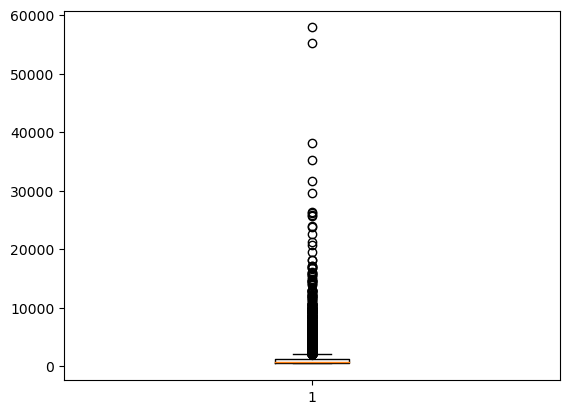

In [244]:
plt.boxplot(high_value_customer_df['total_rech_6'])

In [245]:
## Outlier treatment is required since values are not distributed uniformly

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe1211c6b20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe1211c6310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe1211c6550>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe1211b9be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe1211b9fd0>],
 'means': []}

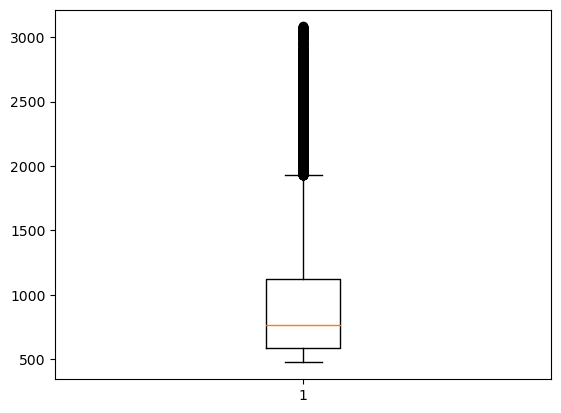

In [246]:
modelling_5_95_DF = high_value_customer_df[high_value_customer_df.total_rech_6 <= 3082.45]
plt.boxplot(modelling_5_95_DF.total_rech_6)

In [247]:
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = high_value_customer_df
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
    plt.show()

In [248]:
high_value_customer_df.head()

,circle_id,last_date_of_month_6,last_date_of_month_7,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,date_of_last_rech_6,date_of_last_rech_7,last_day_rch_amt_6,last_day_rch_amt_7,date_of_last_rech_data_6,date_of_last_rech_data_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,fb_user_6,fb_user_7,aon,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_rech_6,total_rech_7,Churn
4,109,6/30/2014,7/31/2014,240.708,128.191,21.28,4.83,56.99,38.11,53.64,0.0,15.73,0.0,10.16,4.83,36.74,19.88,11.99,1.23,0.00,9.85,58.91,25.94,0.00,0.00,4.35,0.00,0.0,0.0,4.35,0.00,0.0,0.0,0.00,17.0,0.00,0.0,63.26,42.94,5.44,1.39,10.58,4.33,5.51,3.63,21.54,9.36,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,21.54,9.36,0.00,0.0,0.0,0.0,0.00,0.00,13,10,290,136,50,41,6/25/2014,7/26/2014,25,10,6/25/2014,7/23/2014,7.0,7.0,25.0,41.0,7.0,6.0,0.0,1.0,175.0,191.0,390.80,308.89,0.00,0.0,0.00,35.0,0.00,35.12,0.0,0.0,0,0,7,6,0,0,0,1,1.0,1.0,647,0.0,0.00,1225.0,1337.0,1515.0,1473.0,0
10,109,6/30/2014,7/31/2014,445.826,18.310,16.54,0.00,104.81,8.16,18.56,0.0,20.30,0.0,16.54,0.00,47.36,1.44,25.98,0.00,0.00,0.00,89.89,1.44,0.00,0.00,11.16,6.71,0.0,0.0,11.16,6.71,0.0,0.0,0.00,0.0,0.00,0.0,101.06,8.16,17.44,0.00,111.46,2.28,11.78,0.00,140.69,2.28,0.00,0.00,444.79,62.24,0.0,1.53,444.79,63.78,585.49,66.06,0.00,0.0,0.0,0.0,0.00,0.00,8,3,388,0,110,0,6/29/2014,7/22/2014,98,0,6/29/2014,NaN,1.0,0.0,98.0,0.0,1.0,0.0,0.0,0.0,98.0,0.0,6.33,0.00,97.94,0.0,202.27,NaN,14.38,NaN,0.0,NaN,0,0,1,0,0,0,0,0,1.0,NaN,468,0.0,18.95,98.0,0.0,486.0,0.0,0
12,109,6/30/2014,7/31/2014,439.919,397.946,244.46,108.31,571.98,727.91,0.00,0.0,0.00,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.00,0.00,44.01,21.79,244.46,100.44,527.96,713.98,0.0,0.0,772.43,814.43,0.0,0.0,0.00,0.0,0.00,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.0,0.48,7.56,9.13,34.49,35.34,0.00,0.0,0.0,0.0,0.00,0.00,15,10,521,418,110,110,6/29/2014,7/30/2014,110,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,322,0.0,0.00,0.0,0.0,521.0,418.0,0
14,109,6/30/2014,7/31/2014,340.266,205.397,123.76,116.34,98.51,94.11,0.00,0.0,0.00,0.0,88.43,78.51,49.48,41.76,1.76,0.00,8.16,0.00,139.68,120.28,35.33,37.83,38.63,52.34,0.0,0.0,73.96,90.18,0.0,0.0,8.79,0.0,6.23,0.0,228.68,210.46,200.73,149.54,87.36,92.94,1.00,0.41,289.09,242.91,102.34,13.01,19.06,80.34,0.0,0.03,121.41,93.39,414.71,336.78,0.44,0.0,0.0,0.0,3.74,0.46,7,3,530,170,150,120,6/28/2014,7/20/2014,110,120,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,1049,0.0,0.00,0.0,0.0,530.0,170.0,0
15,109,6/30/2014,7/31/2014,580.549,377.294,10.43,24.99,317.11,341.79,0.00,0.0,0.00,0.0,10

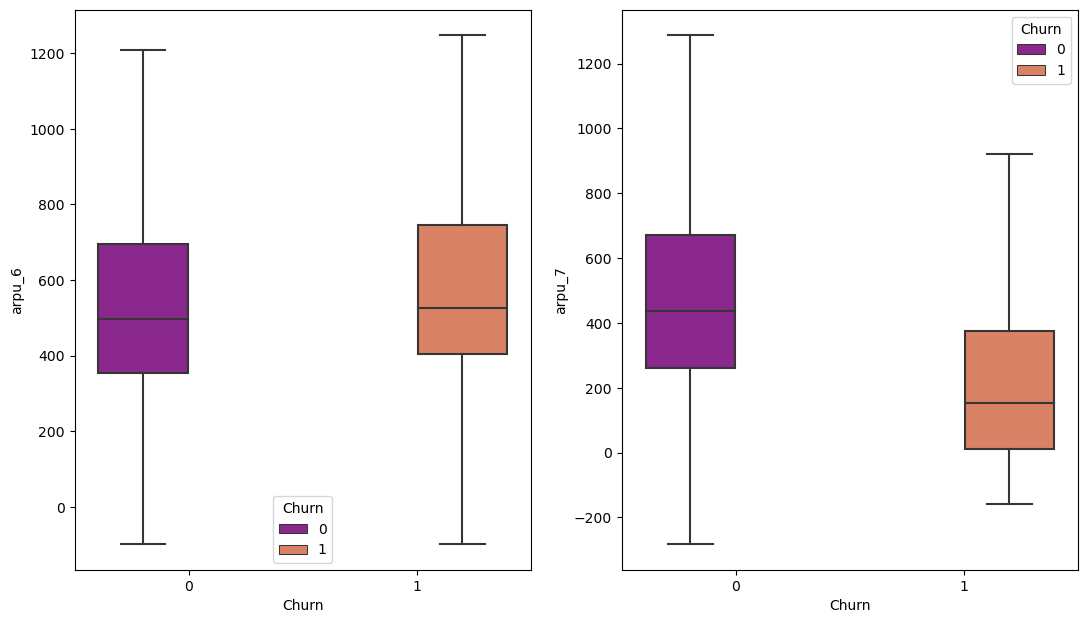

In [249]:
plot_box_chart('arpu')

In [250]:
# We can see that huge drops for Arpu in 7th month for churned customers.
# We can see the differnce between month 6th and 7th is large in preivous month.

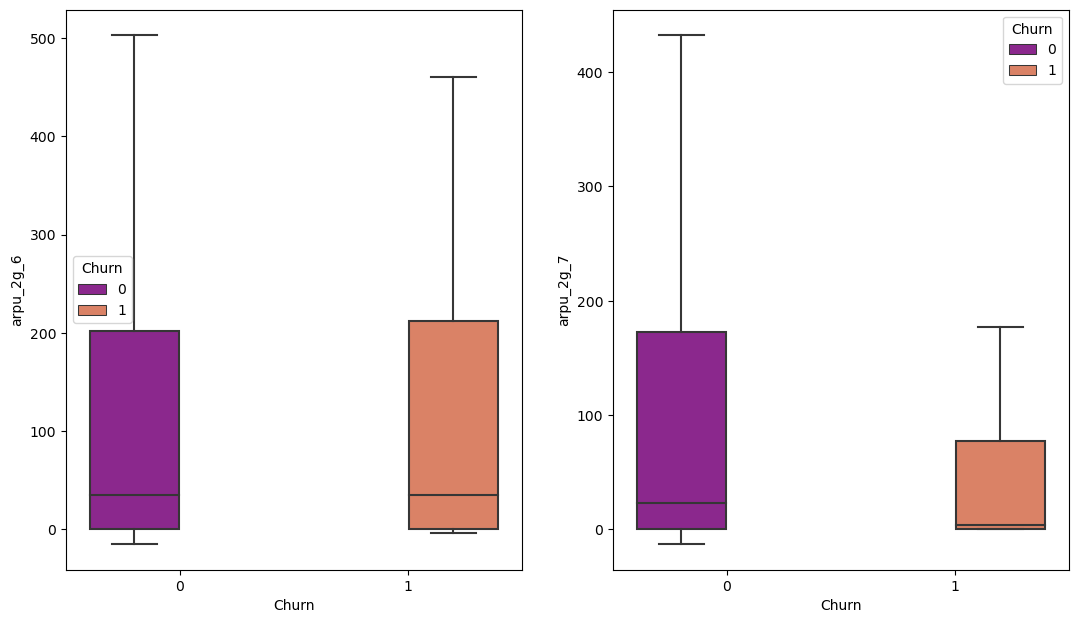

In [251]:
plot_box_chart('arpu_2g')

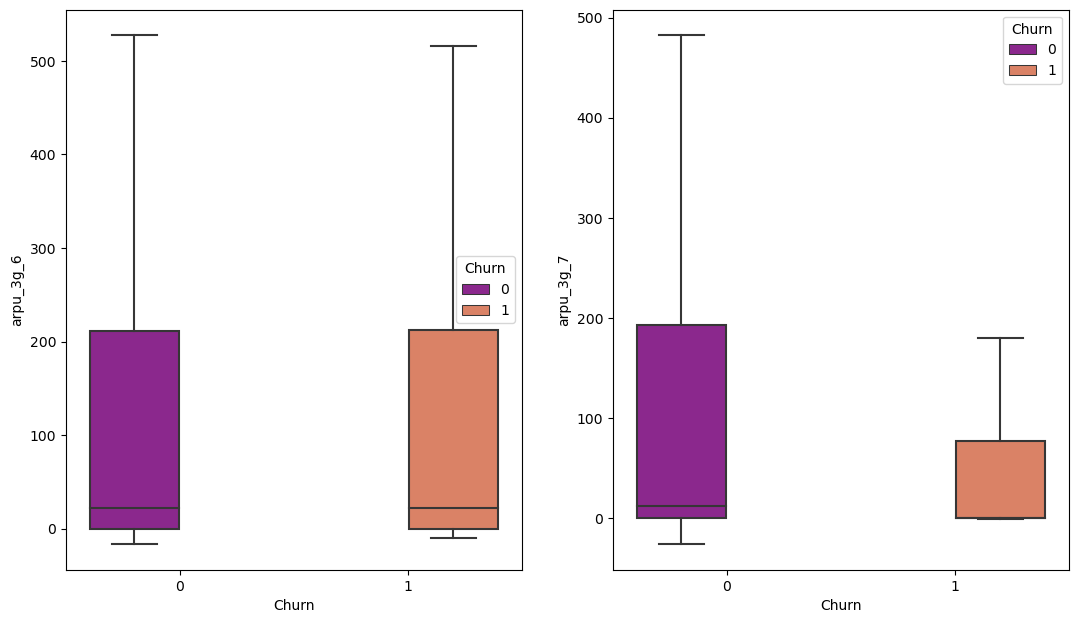

In [252]:
plot_box_chart('arpu_3g')

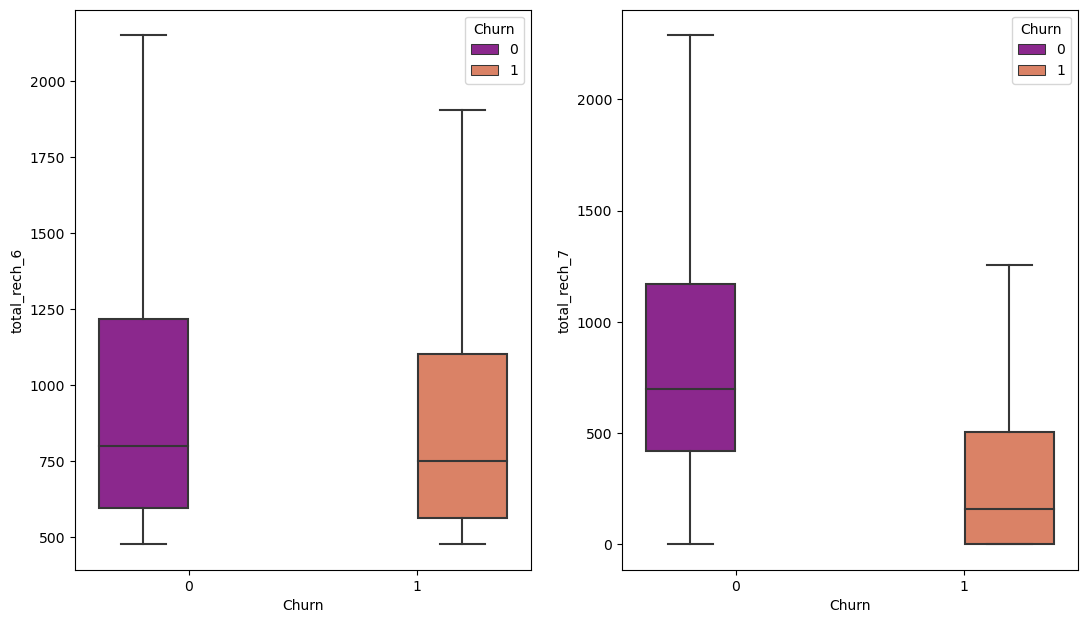

In [253]:
plot_box_chart('total_rech')

In [254]:
#we can see there is drop in total recharge in the month 7

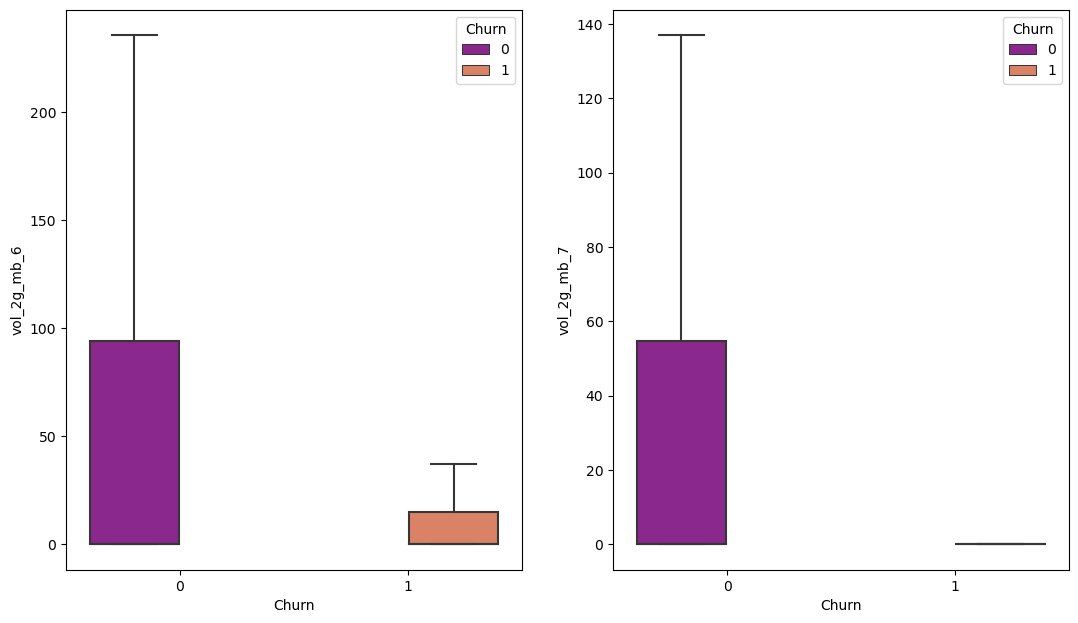

In [255]:
plot_box_chart('vol_2g_mb')

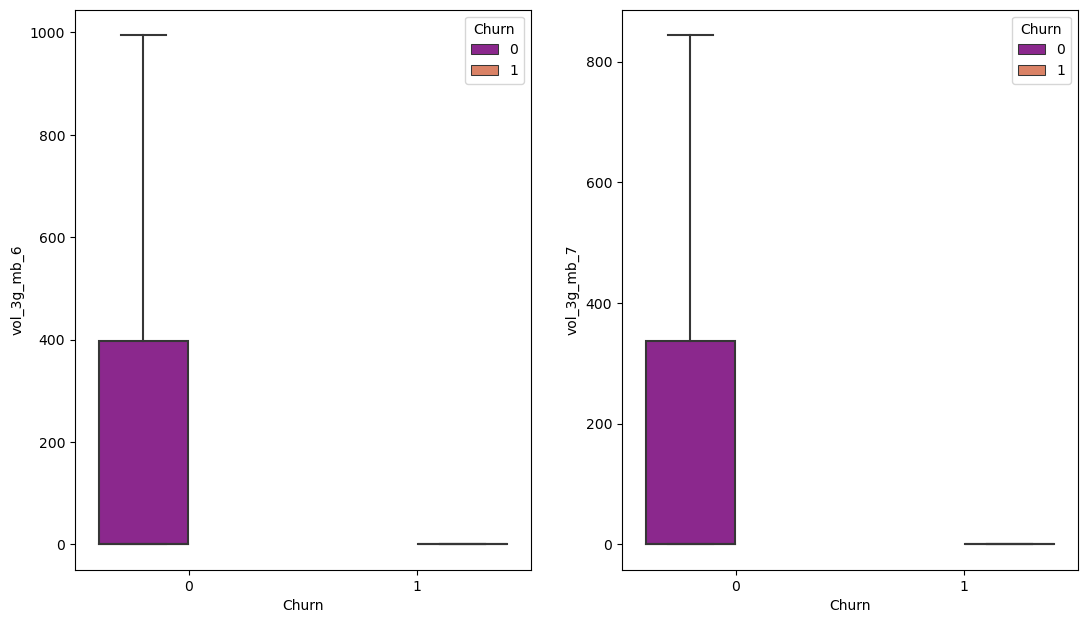

In [256]:
plot_box_chart('vol_3g_mb')

In [257]:
# we can see the there is drop in 2g and 3g data incase of churn

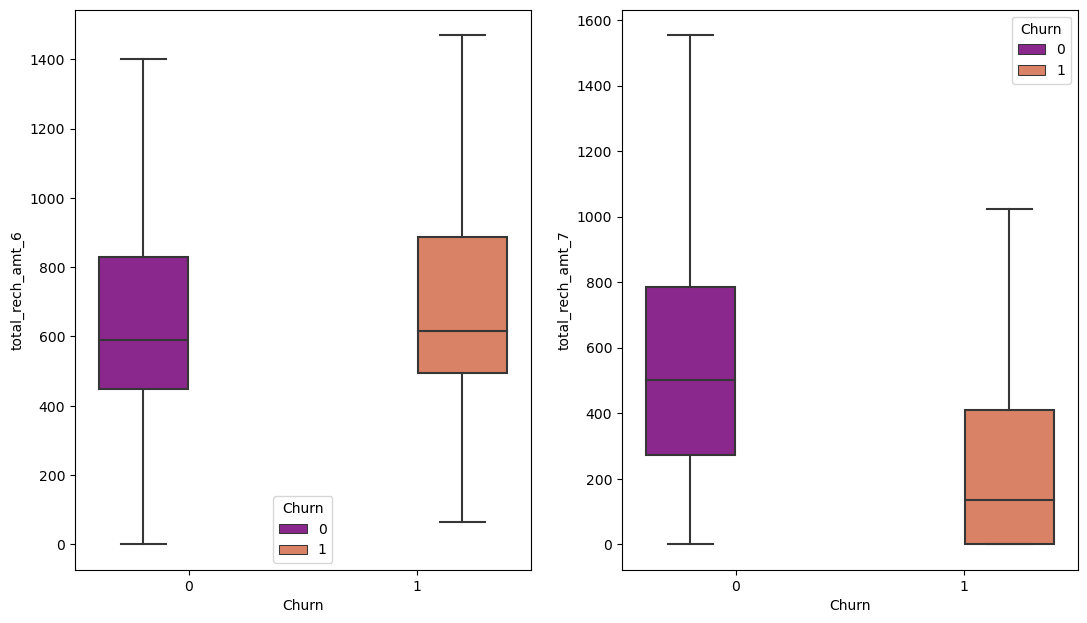

In [258]:
plot_box_chart('total_rech_amt')

In [259]:
# Drop in total recharge amount when customer is churn

In [260]:
def plot_mean_bar_chart(df,columns_list):
    df_0 = df[df.Churn==0].filter(columns_list)
    df_1 = df[df.Churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar


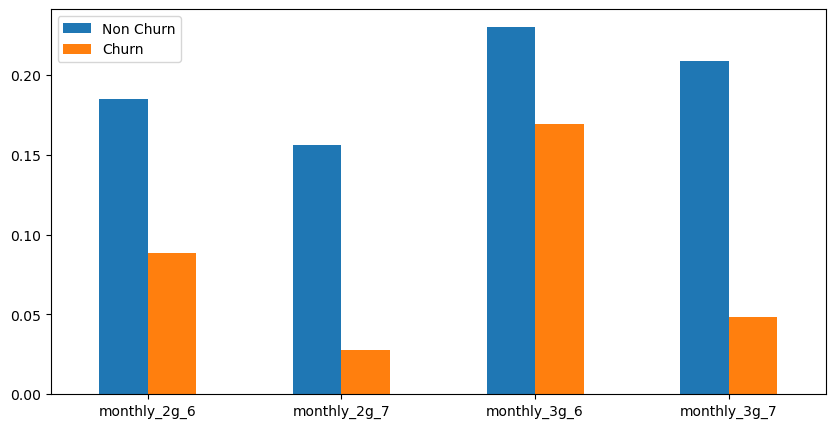

,monthly_2g_6,monthly_2g_7,monthly_3g_6,monthly_3g_7
Non Churn,0.184893,0.156289,0.229760,0.209005
Churn,0.088317,0.027949,0.169368,0.048631


In [261]:
monthly_subcription_2g_3g = high_value_customer_df.columns[high_value_customer_df.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
plot_mean_bar_chart(high_value_customer_df, monthly_subcription_2g_3g)

In [262]:
# we can see again that there is a drop in monthly subscription for churned customers in 7th Month

In [263]:
def heatmap(x,y,dataframe):
    plt.figure(figsize=(x,y))
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()
    

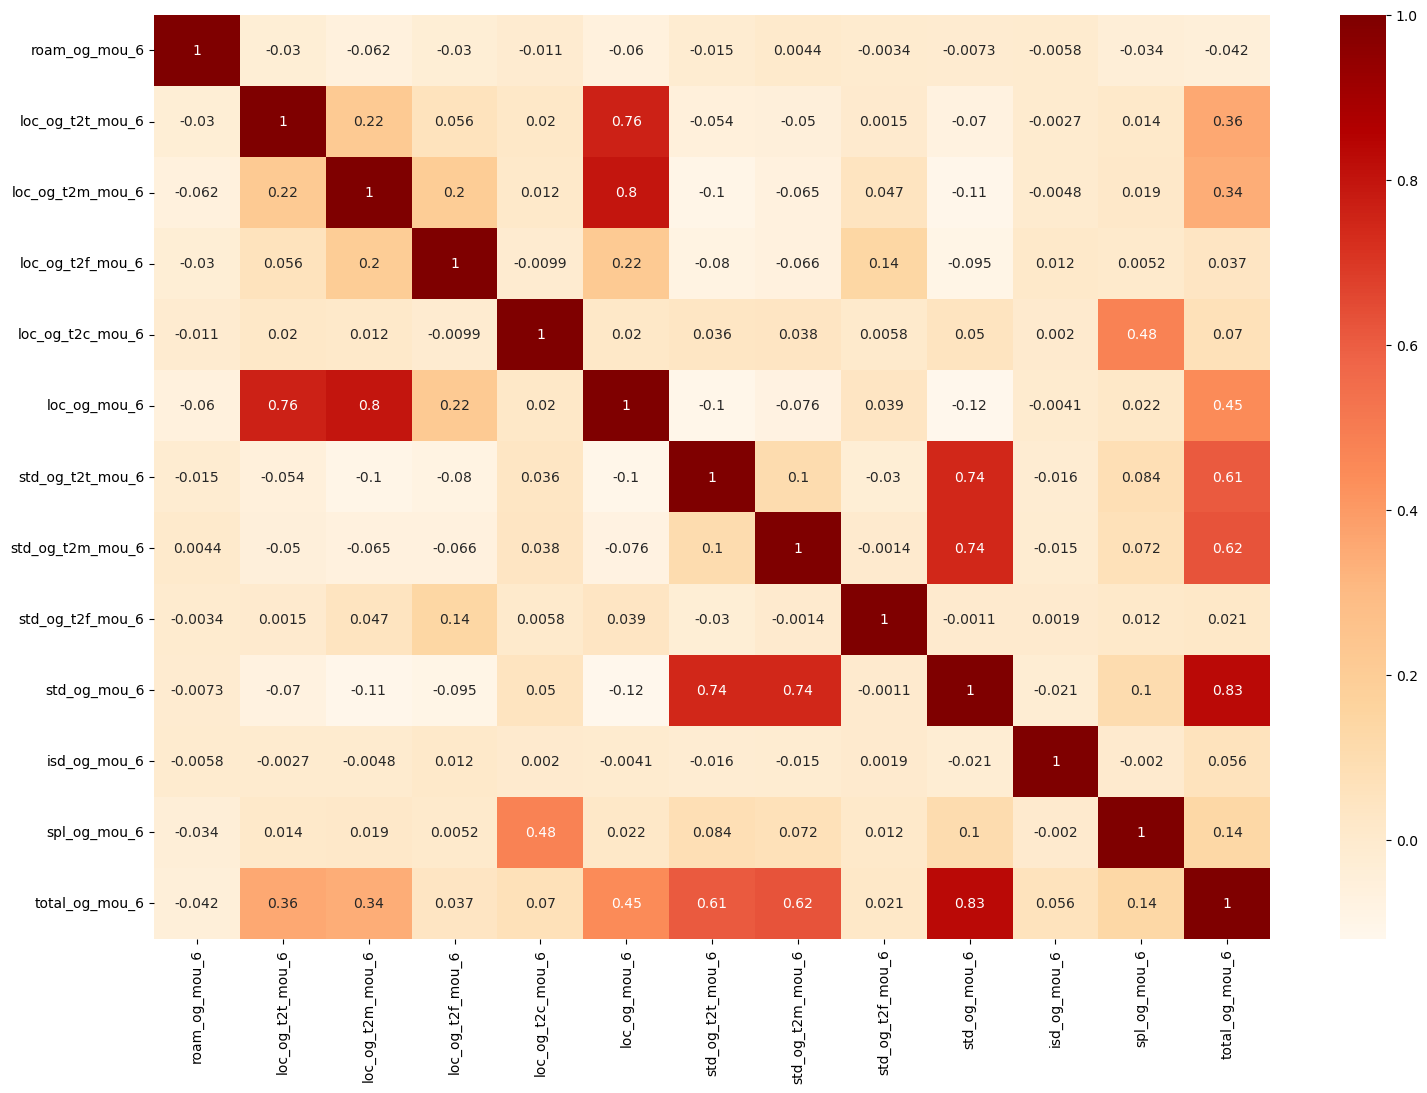

In [264]:
mou_og_cols6 = high_value_customer_df.columns[high_value_customer_df.columns.str.contains('.*_og_.*mou_6',regex=True)]
heatmap(18,12,high_value_customer_df.filter(mou_og_cols6))

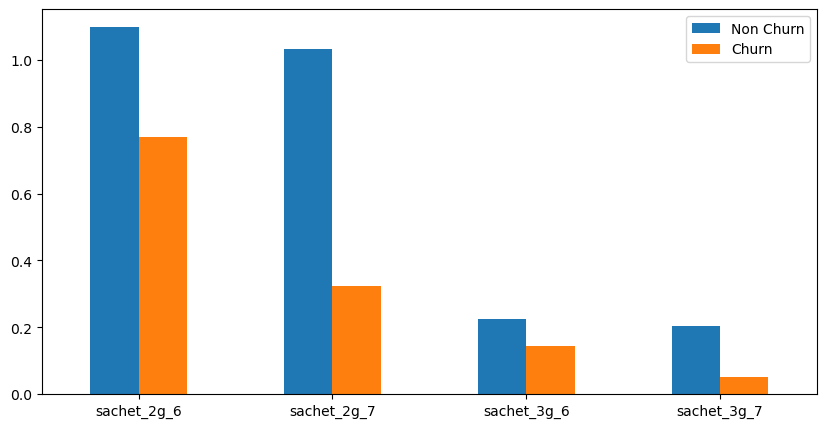

,sachet_2g_6,sachet_2g_7,sachet_3g_6,sachet_3g_7
Non Churn,1.096758,1.032734,0.223358,0.203222
Churn,0.769704,0.323644,0.144774,0.051984


In [265]:
# Checking Service schemes with validity smaller than a month for 2G/3G
SC_2g_or_3g_col = high_value_customer_df.columns[high_value_customer_df.columns.str.contains('sachet_2g|sachet_3g',regex=True)]
plot_mean_bar_chart(high_value_customer_df, SC_2g_or_3g_col)


In [266]:
# We can see the drop in sachet services in 7th month for churned cutsomers

In [267]:
## Splitting data in to X and y 
X = high_value_customer_df[['arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6', 'og_others_7', 'total_og_mou_6', 'total_og_mou_7', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_mou_6', 'std_ic_mou_7', 'total_ic_mou_6', 'total_ic_mou_7', 'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_6', 'isd_ic_mou_7', 'ic_others_6', 'ic_others_7', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_6', 'max_rech_amt_7', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'total_rech_data_6', 'total_rech_data_7', 'max_rech_data_6', 'max_rech_data_7', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_3g_6', 'count_rech_3g_7', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_3g_mb_6', 'vol_3g_mb_7', 'arpu_3g_6', 'arpu_3g_7', 'arpu_2g_6', 'arpu_2g_7', 'night_pck_user_6', 'night_pck_user_7', 'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_6', 'sachet_2g_7', 'monthly_3g_6', 'monthly_3g_7', 'sachet_3g_6', 'sachet_3g_7', 'fb_user_6', 'fb_user_7', 'aon', 'jul_vbc_3g', 'jun_vbc_3g', 'total_data_rech_amt_6', 'total_data_rech_amt_7', 'total_rech_6', 'total_rech_7']]
y = high_value_customer_df.Churn


In [268]:
X.head()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,fb_user_6,fb_user_7,aon,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_rech_6,total_rech_7
4,240.708,128.191,21.28,4.83,56.99,38.11,53.64,0.0,15.73,0.0,10.16,4.83,36.74,19.88,11.99,1.23,0.00,9.85,58.91,25.94,0.00,0.00,4.35,0.00,0.0,0.0,4.35,0.00,0.0,0.0,0.00,17.0,0.00,0.0,63.26,42.94,5.44,1.39,10.58,4.33,5.51,3.63,21.54,9.36,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,21.54,9.36,0.00,0.0,0.0,0.0,0.00,0.00,13,10,290,136,50,41,25,10,7.0,7.0,25.0,41.0,7.0,6.0,0.0,1.0,175.0,191.0,390.80,308.89,0.00,0.0,0.00,35.0,0.00,35.12,0.0,0.0,0,0,7,6,0,0,0,1,1.0,1.0,647,0.0,0.00,1225.0,1337.0,1515.0,1473.0
10,445.826,18.310,16.54,0.00,104.81,8.16,18.56,0.0,20.30,0.0,16.54,0.00,47.36,1.44,25.98,0.00,0.00,0.00,89.89,1.44,0.00,0.00,11.16,6.71,0.0,0.0,11.16,6.71,0.0,0.0,0.00,0.0,0.00,0.0,101.06,8.16,17.44,0.00,111.46,2.28,11.78,0.00,140.69,2.28,0.00,0.00,444.79,62.24,0.0,1.53,444.79,63.78,585.49,66.06,0.00,0.0,0.0,0.0,0.00,0.00,8,3,388,0,110,0,98,0,1.0,0.0,98.0,0.0,1.0,0.0,0.0,0.0,98.0,0.0,6.33,0.00,97.94,0.0,202.27,NaN,14.38,NaN,0.0,NaN,0,0,1,0,0,0,0,0,1.0,NaN,468,0.0,18.95,98.0,0.0,486.0,0.0
12,439.919,397.946,244.46,108.31,571.98,727.91,0.00,0.0,0.00,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.00,0.00,44.01,21.79,244.46,100.44,527.96,713.98,0.0,0.0,772.43,814.43,0.0,0.0,0.00,0.0,0.00,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.0,0.48,7.56,9.13,34.49,35.34,0.00,0.0,0.0,0.0,0.00,0.00,15,10,521,418,110,110,110,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,322,0.0,0.00,0.0,0.0,521.0,418.0
14,340.266,205.397,123.76,116.34,98.51,94.11,0.00,0.0,0.00,0.0,88.43,78.51,49.48,41.76,1.76,0.00,8.16,0.00,139.68,120.28,35.33,37.83,38.63,52.34,0.0,0.0,73.96,90.18,0.0,0.0,8.79,0.0,6.23,0.0,228.68,210.46,200.73,149.54,87.36,92.94,1.00,0.41,289.09,242.91,102.34,13.01,19.06,80.34,0.0,0.03,121.41,93.39,414.71,336.78,0.44,0.0,0.0,0.0,3.74,0.46,7,3,530,170,150,120,110,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,1049,0.0,0.00,0.0,0.0,530.0,170.0
15,580.549,377.294,10.43,24.99,317.11,341.79,0.00,0.0,0.00,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.00,0.00,327.46,366.79,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.08,0.0,0.10,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.0,1.03,0.00,1.03,233.18,777.39,0.00,0.0,0.0,0.0,0.00,0.00,5,3,654,400,250,250,0,150,1.0,0.0,154.0,0.0,1.0,0.0,0.0,0.0,154.0,0.0,260.42,0.00,0.00,0.0,0.00,NaN,164.75,NaN,0.0,NaN,1,0,0,0,0,0,0,0,1.0,

In [269]:
X.shape

(21157, 105)

In [270]:
100 * (X.isnull().sum()/len(X))

arpu_6                    0.000000
arpu_7                    0.000000
onnet_mou_6               0.000000
onnet_mou_7               0.000000
offnet_mou_6              0.000000
offnet_mou_7              0.000000
roam_ic_mou_6             0.000000
roam_ic_mou_7             0.000000
roam_og_mou_6             0.000000
roam_og_mou_7             0.000000
loc_og_t2t_mou_6          0.000000
loc_og_t2t_mou_7          0.000000
loc_og_t2m_mou_6          0.000000
loc_og_t2m_mou_7          0.000000
loc_og_t2f_mou_6          0.000000
loc_og_t2f_mou_7          0.000000
loc_og_t2c_mou_6          0.000000
loc_og_t2c_mou_7          0.000000
loc_og_mou_6              0.000000
loc_og_mou_7              0.000000
std_og_t2t_mou_6          0.000000
std_og_t2t_mou_7          0.000000
std_og_t2m_mou_6          0.000000
std_og_t2m_mou_7          0.000000
std_og_t2f_mou_6          0.000000
std_og_t2f_mou_7          0.000000
std_og_mou_6              0.000000
std_og_mou_7              0.000000
isd_og_mou_6        

In [271]:
## Drop unwanted columns
X = X.drop(columns=['fb_user_6','fb_user_7'])

## Fill 0 to arpu_3g and arpu_2g and night_pck
X = X.fillna(0)

In [272]:
X.head()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_rech_6,total_rech_7
4,240.708,128.191,21.28,4.83,56.99,38.11,53.64,0.0,15.73,0.0,10.16,4.83,36.74,19.88,11.99,1.23,0.00,9.85,58.91,25.94,0.00,0.00,4.35,0.00,0.0,0.0,4.35,0.00,0.0,0.0,0.00,17.0,0.00,0.0,63.26,42.94,5.44,1.39,10.58,4.33,5.51,3.63,21.54,9.36,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,21.54,9.36,0.00,0.0,0.0,0.0,0.00,0.00,13,10,290,136,50,41,25,10,7.0,7.0,25.0,41.0,7.0,6.0,0.0,1.0,175.0,191.0,390.80,308.89,0.00,0.0,0.00,35.0,0.00,35.12,0.0,0.0,0,0,7,6,0,0,0,1,647,0.0,0.00,1225.0,1337.0,1515.0,1473.0
10,445.826,18.310,16.54,0.00,104.81,8.16,18.56,0.0,20.30,0.0,16.54,0.00,47.36,1.44,25.98,0.00,0.00,0.00,89.89,1.44,0.00,0.00,11.16,6.71,0.0,0.0,11.16,6.71,0.0,0.0,0.00,0.0,0.00,0.0,101.06,8.16,17.44,0.00,111.46,2.28,11.78,0.00,140.69,2.28,0.00,0.00,444.79,62.24,0.0,1.53,444.79,63.78,585.49,66.06,0.00,0.0,0.0,0.0,0.00,0.00,8,3,388,0,110,0,98,0,1.0,0.0,98.0,0.0,1.0,0.0,0.0,0.0,98.0,0.0,6.33,0.00,97.94,0.0,202.27,0.0,14.38,0.00,0.0,0.0,0,0,1,0,0,0,0,0,468,0.0,18.95,98.0,0.0,486.0,0.0
12,439.919,397.946,244.46,108.31,571.98,727.91,0.00,0.0,0.00,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.00,0.00,44.01,21.79,244.46,100.44,527.96,713.98,0.0,0.0,772.43,814.43,0.0,0.0,0.00,0.0,0.00,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.0,0.48,7.56,9.13,34.49,35.34,0.00,0.0,0.0,0.0,0.00,0.00,15,10,521,418,110,110,110,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,322,0.0,0.00,0.0,0.0,521.0,418.0
14,340.266,205.397,123.76,116.34,98.51,94.11,0.00,0.0,0.00,0.0,88.43,78.51,49.48,41.76,1.76,0.00,8.16,0.00,139.68,120.28,35.33,37.83,38.63,52.34,0.0,0.0,73.96,90.18,0.0,0.0,8.79,0.0,6.23,0.0,228.68,210.46,200.73,149.54,87.36,92.94,1.00,0.41,289.09,242.91,102.34,13.01,19.06,80.34,0.0,0.03,121.41,93.39,414.71,336.78,0.44,0.0,0.0,0.0,3.74,0.46,7,3,530,170,150,120,110,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,1049,0.0,0.00,0.0,0.0,530.0,170.0
15,580.549,377.294,10.43,24.99,317.11,341.79,0.00,0.0,0.00,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.00,0.00,327.46,366.79,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.08,0.0,0.10,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.0,1.03,0.00,1.03,233.18,777.39,0.00,0.0,0.0,0.0,0.00,0.00,5,3,654,400,250,250,0,150,1.0,0.0,154.0,0.0,1.0,0.0,0.0,0.0,154.0,0.0,260.42,0.00,0.00,0.0,0.00,0.0,164.75,0.00,0.0,0.0,1,0,0,0,0,0,0,0,602,0.0,0.00,154.0,0.0,808.0,400.0


In [273]:
100 * (X.isnull().sum()/len(X))

arpu_6                   0.0
arpu_7                   0.0
onnet_mou_6              0.0
onnet_mou_7              0.0
offnet_mou_6             0.0
offnet_mou_7             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
loc_og_t2t_mou_6         0.0
loc_og_t2t_mou_7         0.0
loc_og_t2m_mou_6         0.0
loc_og_t2m_mou_7         0.0
loc_og_t2f_mou_6         0.0
loc_og_t2f_mou_7         0.0
loc_og_t2c_mou_6         0.0
loc_og_t2c_mou_7         0.0
loc_og_mou_6             0.0
loc_og_mou_7             0.0
std_og_t2t_mou_6         0.0
std_og_t2t_mou_7         0.0
std_og_t2m_mou_6         0.0
std_og_t2m_mou_7         0.0
std_og_t2f_mou_6         0.0
std_og_t2f_mou_7         0.0
std_og_mou_6             0.0
std_og_mou_7             0.0
isd_og_mou_6             0.0
isd_og_mou_7             0.0
spl_og_mou_6             0.0
spl_og_mou_7             0.0
og_others_6              0.0
og_others_7              0.0
total_og_mou_6

In [274]:
## Drop un wanted columns which will not add value for modelling

### onnet offnet - 

X = X.drop(columns=['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7'])

In [275]:
X['roam_any_6'] = X[['roam_ic_mou_6', 'roam_og_mou_6']].sum(axis = 1)
X['roam_any_7'] = X[['roam_ic_mou_7', 'roam_og_mou_7']].sum(axis = 1)
X.head()

,arpu_6,arpu_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_rech_6,total_rech_7,roam_any_6,roam_any_7
4,240.708,128.191,53.64,0.0,15.73,0.0,10.16,4.83,36.74,19.88,11.99,1.23,0.00,9.85,58.91,25.94,0.00,0.00,4.35,0.00,0.0,0.0,4.35,0.00,0.0,0.0,0.00,17.0,0.00,0.0,63.26,42.94,5.44,1.39,10.58,4.33,5.51,3.63,21.54,9.36,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,21.54,9.36,0.00,0.0,0.0,0.0,0.00,0.00,13,10,290,136,50,41,25,10,7.0,7.0,25.0,41.0,7.0,6.0,0.0,1.0,175.0,191.0,390.80,308.89,0.00,0.0,0.00,35.0,0.00,35.12,0.0,0.0,0,0,7,6,0,0,0,1,647,0.0,0.00,1225.0,1337.0,1515.0,1473.0,69.37,0.0
10,445.826,18.310,18.56,0.0,20.30,0.0,16.54,0.00,47.36,1.44,25.98,0.00,0.00,0.00,89.89,1.44,0.00,0.00,11.16,6.71,0.0,0.0,11.16,6.71,0.0,0.0,0.00,0.0,0.00,0.0,101.06,8.16,17.44,0.00,111.46,2.28,11.78,0.00,140.69,2.28,0.00,0.00,444.79,62.24,0.0,1.53,444.79,63.78,585.49,66.06,0.00,0.0,0.0,0.0,0.00,0.00,8,3,388,0,110,0,98,0,1.0,0.0,98.0,0.0,1.0,0.0,0.0,0.0,98.0,0.0,6.33,0.00,97.94,0.0,202.27,0.0,14.38,0.00,0.0,0.0,0,0,1,0,0,0,0,0,468,0.0,18.95,98.0,0.0,486.0,0.0,38.86,0.0
12,439.919,397.946,0.00,0.0,0.00,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.00,0.00,44.01,21.79,244.46,100.44,527.96,713.98,0.0,0.0,772.43,814.43,0.0,0.0,0.00,0.0,0.00,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.0,0.48,7.56,9.13,34.49,35.34,0.00,0.0,0.0,0.0,0.00,0.00,15,10,521,418,110,110,110,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,322,0.0,0.00,0.0,0.0,521.0,418.0,0.00,0.0
14,340.266,205.397,0.00,0.0,0.00,0.0,88.43,78.51,49.48,41.76,1.76,0.00,8.16,0.00,139.68,120.28,35.33,37.83,38.63,52.34,0.0,0.0,73.96,90.18,0.0,0.0,8.79,0.0,6.23,0.0,228.68,210.46,200.73,149.54,87.36,92.94,1.00,0.41,289.09,242.91,102.34,13.01,19.06,80.34,0.0,0.03,121.41,93.39,414.71,336.78,0.44,0.0,0.0,0.0,3.74,0.46,7,3,530,170,150,120,110,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,1049,0.0,0.00,0.0,0.0,530.0,170.0,0.00,0.0
15,580.549,377.294,0.00,0.0,0.00,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.00,0.00,327.46,366.79,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.08,0.0,0.10,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.0,1.03,0.00,1.03,233.18,777.39,0.00,0.0,0.0,0.0,0.00,0.00,5,3,654,400,250,250,0,150,1.0,0.0,154.0,0.0,1.0,0.0,0.0,0.0,154.0,0.0,260.42,0.00,0.00,0.0,0.00,0.0,164.75,0.00,0.0,0.0,1,0,0,0,0,0,0,0,602,0.0,0.00,154.0,0.0,808.0,400.0,0.00,0.0


In [276]:
X['roam_any_6'] = X['roam_any_6'].apply(lambda x: 1 if (x>0) else 0)
X['roam_any_7'] = X['roam_any_7'].apply(lambda x: 1 if (x>0) else 0)
X.head()

,arpu_6,arpu_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_rech_6,total_rech_7,roam_any_6,roam_any_7
4,240.708,128.191,53.64,0.0,15.73,0.0,10.16,4.83,36.74,19.88,11.99,1.23,0.00,9.85,58.91,25.94,0.00,0.00,4.35,0.00,0.0,0.0,4.35,0.00,0.0,0.0,0.00,17.0,0.00,0.0,63.26,42.94,5.44,1.39,10.58,4.33,5.51,3.63,21.54,9.36,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,21.54,9.36,0.00,0.0,0.0,0.0,0.00,0.00,13,10,290,136,50,41,25,10,7.0,7.0,25.0,41.0,7.0,6.0,0.0,1.0,175.0,191.0,390.80,308.89,0.00,0.0,0.00,35.0,0.00,35.12,0.0,0.0,0,0,7,6,0,0,0,1,647,0.0,0.00,1225.0,1337.0,1515.0,1473.0,1,0
10,445.826,18.310,18.56,0.0,20.30,0.0,16.54,0.00,47.36,1.44,25.98,0.00,0.00,0.00,89.89,1.44,0.00,0.00,11.16,6.71,0.0,0.0,11.16,6.71,0.0,0.0,0.00,0.0,0.00,0.0,101.06,8.16,17.44,0.00,111.46,2.28,11.78,0.00,140.69,2.28,0.00,0.00,444.79,62.24,0.0,1.53,444.79,63.78,585.49,66.06,0.00,0.0,0.0,0.0,0.00,0.00,8,3,388,0,110,0,98,0,1.0,0.0,98.0,0.0,1.0,0.0,0.0,0.0,98.0,0.0,6.33,0.00,97.94,0.0,202.27,0.0,14.38,0.00,0.0,0.0,0,0,1,0,0,0,0,0,468,0.0,18.95,98.0,0.0,486.0,0.0,1,0
12,439.919,397.946,0.00,0.0,0.00,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.00,0.00,44.01,21.79,244.46,100.44,527.96,713.98,0.0,0.0,772.43,814.43,0.0,0.0,0.00,0.0,0.00,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.0,0.48,7.56,9.13,34.49,35.34,0.00,0.0,0.0,0.0,0.00,0.00,15,10,521,418,110,110,110,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,322,0.0,0.00,0.0,0.0,521.0,418.0,0,0
14,340.266,205.397,0.00,0.0,0.00,0.0,88.43,78.51,49.48,41.76,1.76,0.00,8.16,0.00,139.68,120.28,35.33,37.83,38.63,52.34,0.0,0.0,73.96,90.18,0.0,0.0,8.79,0.0,6.23,0.0,228.68,210.46,200.73,149.54,87.36,92.94,1.00,0.41,289.09,242.91,102.34,13.01,19.06,80.34,0.0,0.03,121.41,93.39,414.71,336.78,0.44,0.0,0.0,0.0,3.74,0.46,7,3,530,170,150,120,110,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,1049,0.0,0.00,0.0,0.0,530.0,170.0,0,0
15,580.549,377.294,0.00,0.0,0.00,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.00,0.00,327.46,366.79,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.08,0.0,0.10,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.0,1.03,0.00,1.03,233.18,777.39,0.00,0.0,0.0,0.0,0.00,0.00,5,3,654,400,250,250,0,150,1.0,0.0,154.0,0.0,1.0,0.0,0.0,0.0,154.0,0.0,260.42,0.00,0.00,0.0,0.00,0.0,164.75,0.00,0.0,0.0,1,0,0,0,0,0,0,0,602,0.0,0.00,154.0,0.0,808.0,400.0,0,0


In [277]:
## Drop columns containing values for roam ic or roam og
## 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7'

X = X.drop(columns=['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7'])
X.head()

,arpu_6,arpu_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_rech_6,total_rech_7,roam_any_6,roam_any_7
4,240.708,128.191,10.16,4.83,36.74,19.88,11.99,1.23,0.00,9.85,58.91,25.94,0.00,0.00,4.35,0.00,0.0,0.0,4.35,0.00,0.0,0.0,0.00,17.0,0.00,0.0,63.26,42.94,5.44,1.39,10.58,4.33,5.51,3.63,21.54,9.36,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,21.54,9.36,0.00,0.0,0.0,0.0,0.00,0.00,13,10,290,136,50,41,25,10,7.0,7.0,25.0,41.0,7.0,6.0,0.0,1.0,175.0,191.0,390.80,308.89,0.00,0.0,0.00,35.0,0.00,35.12,0.0,0.0,0,0,7,6,0,0,0,1,647,0.0,0.00,1225.0,1337.0,1515.0,1473.0,1,0
10,445.826,18.310,16.54,0.00,47.36,1.44,25.98,0.00,0.00,0.00,89.89,1.44,0.00,0.00,11.16,6.71,0.0,0.0,11.16,6.71,0.0,0.0,0.00,0.0,0.00,0.0,101.06,8.16,17.44,0.00,111.46,2.28,11.78,0.00,140.69,2.28,0.00,0.00,444.79,62.24,0.0,1.53,444.79,63.78,585.49,66.06,0.00,0.0,0.0,0.0,0.00,0.00,8,3,388,0,110,0,98,0,1.0,0.0,98.0,0.0,1.0,0.0,0.0,0.0,98.0,0.0,6.33,0.00,97.94,0.0,202.27,0.0,14.38,0.00,0.0,0.0,0,0,1,0,0,0,0,0,468,0.0,18.95,98.0,0.0,486.0,0.0,1,0
12,439.919,397.946,0.00,7.86,44.01,13.93,0.00,0.00,0.00,0.00,44.01,21.79,244.46,100.44,527.96,713.98,0.0,0.0,772.43,814.43,0.0,0.0,0.00,0.0,0.00,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.0,0.48,7.56,9.13,34.49,35.34,0.00,0.0,0.0,0.0,0.00,0.00,15,10,521,418,110,110,110,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,322,0.0,0.00,0.0,0.0,521.0,418.0,0,0
14,340.266,205.397,88.43,78.51,49.48,41.76,1.76,0.00,8.16,0.00,139.68,120.28,35.33,37.83,38.63,52.34,0.0,0.0,73.96,90.18,0.0,0.0,8.79,0.0,6.23,0.0,228.68,210.46,200.73,149.54,87.36,92.94,1.00,0.41,289.09,242.91,102.34,13.01,19.06,80.34,0.0,0.03,121.41,93.39,414.71,336.78,0.44,0.0,0.0,0.0,3.74,0.46,7,3,530,170,150,120,110,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,1049,0.0,0.00,0.0,0.0,530.0,170.0,0,0
15,580.549,377.294,10.43,24.99,313.76,330.88,3.26,10.91,0.00,0.00,327.46,366.79,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.08,0.0,0.10,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.0,1.03,0.00,1.03,233.18,777.39,0.00,0.0,0.0,0.0,0.00,0.00,5,3,654,400,250,250,0,150,1.0,0.0,154.0,0.0,1.0,0.0,0.0,0.0,154.0,0.0,260.42,0.00,0.00,0.0,0.00,0.0,164.75,0.00,0.0,0.0,1,0,0,0,0,0,0,0,602,0.0,0.00,154.0,0.0,808.0,400.0,0,0


In [278]:
## Add all local ic and og columns and add a new column which says if local value is true for data
X['local_any_6'] = X[['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6']].sum(axis=1)
X['local_any_7'] = X[['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7']].sum(axis=1)

X['local_any_6'] = X['local_any_6'].apply(lambda x: 1 if (x > 0) else 0)
X['local_any_7'] = X['local_any_7'].apply(lambda x: 1 if (x > 0) else 0)

X = X.drop(columns=['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7'])
X.head()


,arpu_6,arpu_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_rech_6,total_rech_7,roam_any_6,roam_any_7,local_any_6,local_any_7
4,240.708,128.191,0.00,0.00,4.35,0.00,0.0,0.0,4.35,0.00,0.0,0.0,0.00,17.0,0.00,0.0,63.26,42.94,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,21.54,9.36,0.00,0.0,0.0,0.0,0.00,0.00,13,10,290,136,50,41,25,10,7.0,7.0,25.0,41.0,7.0,6.0,0.0,1.0,175.0,191.0,390.80,308.89,0.00,0.0,0.00,35.0,0.00,35.12,0.0,0.0,0,0,7,6,0,0,0,1,647,0.0,0.00,1225.0,1337.0,1515.0,1473.0,1,0,1,1
10,445.826,18.310,0.00,0.00,11.16,6.71,0.0,0.0,11.16,6.71,0.0,0.0,0.00,0.0,0.00,0.0,101.06,8.16,0.00,0.00,444.79,62.24,0.0,1.53,444.79,63.78,585.49,66.06,0.00,0.0,0.0,0.0,0.00,0.00,8,3,388,0,110,0,98,0,1.0,0.0,98.0,0.0,1.0,0.0,0.0,0.0,98.0,0.0,6.33,0.00,97.94,0.0,202.27,0.0,14.38,0.00,0.0,0.0,0,0,1,0,0,0,0,0,468,0.0,18.95,98.0,0.0,486.0,0.0,1,0,1,1
12,439.919,397.946,244.46,100.44,527.96,713.98,0.0,0.0,772.43,814.43,0.0,0.0,0.00,0.0,0.00,0.0,816.44,836.23,0.23,0.00,7.33,8.64,0.0,0.48,7.56,9.13,34.49,35.34,0.00,0.0,0.0,0.0,0.00,0.00,15,10,521,418,110,110,110,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,322,0.0,0.00,0.0,0.0,521.0,418.0,0,0,1,1
14,340.266,205.397,35.33,37.83,38.63,52.34,0.0,0.0,73.96,90.18,0.0,0.0,8.79,0.0,6.23,0.0,228.68,210.46,102.34,13.01,19.06,80.34,0.0,0.03,121.41,93.39,414.71,336.78,0.44,0.0,0.0,0.0,3.74,0.46,7,3,530,170,150,120,110,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,1049,0.0,0.00,0.0,0.0,530.0,170.0,0,0,1,1
15,580.549,377.294,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.08,0.0,0.10,0.0,327.64,366.79,0.00,0.00,0.00,0.00,0.0,1.03,0.00,1.03,233.18,777.39,0.00,0.0,0.0,0.0,0.00,0.00,5,3,654,400,250,250,0,150,1.0,0.0,154.0,0.0,1.0,0.0,0.0,0.0,154.0,0.0,260.42,0.00,0.00,0.0,0.00,0.0,164.75,0.00,0.0,0.0,1,0,0,0,0,0,0,0,602,0.0,0.00,154.0,0.0,808.0,400.0,0,0,1,1


In [279]:
## Add all std ic and og columns and add a new column which says if std value is true for data
X['std_any_6'] = X[['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6']].sum(axis=1)
X['std_any_7'] = X[['std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7']].sum(axis=1)

X['std_any_6'] = X['std_any_6'].apply(lambda x: 1 if (x > 0) else 0)
X['std_any_7'] = X['std_any_7'].apply(lambda x: 1 if (x > 0) else 0)
X = X.drop(columns=['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_mou_6', 'std_ic_mou_7'])
X.head()


,arpu_6,arpu_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_rech_6,total_rech_7,roam_any_6,roam_any_7,local_any_6,local_any_7,std_any_6,std_any_7
4,240.708,128.191,0.0,0.0,0.00,17.0,0.00,0.0,63.26,42.94,21.54,9.36,0.00,0.0,0.0,0.0,0.00,0.00,13,10,290,136,50,41,25,10,7.0,7.0,25.0,41.0,7.0,6.0,0.0,1.0,175.0,191.0,390.80,308.89,0.00,0.0,0.00,35.0,0.00,35.12,0.0,0.0,0,0,7,6,0,0,0,1,647,0.0,0.00,1225.0,1337.0,1515.0,1473.0,1,0,1,1,1,0
10,445.826,18.310,0.0,0.0,0.00,0.0,0.00,0.0,101.06,8.16,585.49,66.06,0.00,0.0,0.0,0.0,0.00,0.00,8,3,388,0,110,0,98,0,1.0,0.0,98.0,0.0,1.0,0.0,0.0,0.0,98.0,0.0,6.33,0.00,97.94,0.0,202.27,0.0,14.38,0.00,0.0,0.0,0,0,1,0,0,0,0,0,468,0.0,18.95,98.0,0.0,486.0,0.0,1,0,1,1,1,1
12,439.919,397.946,0.0,0.0,0.00,0.0,0.00,0.0,816.44,836.23,34.49,35.34,0.00,0.0,0.0,0.0,0.00,0.00,15,10,521,418,110,110,110,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,322,0.0,0.00,0.0,0.0,521.0,418.0,0,0,1,1,1,1
14,340.266,205.397,0.0,0.0,8.79,0.0,6.23,0.0,228.68,210.46,414.71,336.78,0.44,0.0,0.0,0.0,3.74,0.46,7,3,530,170,150,120,110,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,1049,0.0,0.00,0.0,0.0,530.0,170.0,0,0,1,1,1,1
15,580.549,377.294,0.0,0.0,0.08,0.0,0.10,0.0,327.64,366.79,233.18,777.39,0.00,0.0,0.0,0.0,0.00,0.00,5,3,654,400,250,250,0,150,1.0,0.0,154.0,0.0,1.0,0.0,0.0,0.0,154.0,0.0,260.42,0.00,0.00,0.0,0.00,0.0,164.75,0.00,0.0,0.0,1,0,0,0,0,0,0,0,602,0.0,0.00,154.0,0.0,808.0,400.0,0,0,1,1,0,1


In [280]:
## Add all isd & spl ic and og columns and add a new column which says if spl value is true for data
X['spl_any_6'] = X[['isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']].sum(axis=1)
X['spl_any_7'] = X[['isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']].sum(axis=1)

X['spl_any_6'] = X['spl_any_6'].apply(lambda x: 1 if (x > 0) else 0)
X['spl_any_7'] = X['spl_any_7'].apply(lambda x: 1 if (x > 0) else 0)

X = X.drop(columns=['isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6', 'og_others_7',  'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_6', 'isd_ic_mou_7', 'ic_others_6', 'ic_others_7'])
X.head()


,arpu_6,arpu_7,total_og_mou_6,total_og_mou_7,total_ic_mou_6,total_ic_mou_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_rech_6,total_rech_7,roam_any_6,roam_any_7,local_any_6,local_any_7,std_any_6,std_any_7,spl_any_6,spl_any_7
4,240.708,128.191,63.26,42.94,21.54,9.36,13,10,290,136,50,41,25,10,7.0,7.0,25.0,41.0,7.0,6.0,0.0,1.0,175.0,191.0,390.80,308.89,0.00,0.0,0.00,35.0,0.00,35.12,0.0,0.0,0,0,7,6,0,0,0,1,647,0.0,0.00,1225.0,1337.0,1515.0,1473.0,1,0,1,1,1,0,0,1
10,445.826,18.310,101.06,8.16,585.49,66.06,8,3,388,0,110,0,98,0,1.0,0.0,98.0,0.0,1.0,0.0,0.0,0.0,98.0,0.0,6.33,0.00,97.94,0.0,202.27,0.0,14.38,0.00,0.0,0.0,0,0,1,0,0,0,0,0,468,0.0,18.95,98.0,0.0,486.0,0.0,1,0,1,1,1,1,0,0
12,439.919,397.946,816.44,836.23,34.49,35.34,15,10,521,418,110,110,110,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,322,0.0,0.00,0.0,0.0,521.0,418.0,0,0,1,1,1,1,0,0
14,340.266,205.397,228.68,210.46,414.71,336.78,7,3,530,170,150,120,110,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,1049,0.0,0.00,0.0,0.0,530.0,170.0,0,0,1,1,1,1,1,1
15,580.549,377.294,327.64,366.79,233.18,777.39,5,3,654,400,250,250,0,150,1.0,0.0,154.0,0.0,1.0,0.0,0.0,0.0,154.0,0.0,260.42,0.00,0.00,0.0,0.00,0.0,164.75,0.00,0.0,0.0,1,0,0,0,0,0,0,0,602,0.0,0.00,154.0,0.0,808.0,400.0,0,0,1,1,0,1,1,0


In [281]:
## max column will be removed as we already have total recharge column 
X = X.drop(columns=['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_data_6', 'max_rech_data_7'])
X.head()

,arpu_6,arpu_7,total_og_mou_6,total_og_mou_7,total_ic_mou_6,total_ic_mou_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_6,total_rech_data_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_rech_6,total_rech_7,roam_any_6,roam_any_7,local_any_6,local_any_7,std_any_6,std_any_7,spl_any_6,spl_any_7
4,240.708,128.191,63.26,42.94,21.54,9.36,13,10,290,136,25,10,7.0,7.0,7.0,6.0,0.0,1.0,175.0,191.0,390.80,308.89,0.00,0.0,0.00,35.0,0.00,35.12,0.0,0.0,0,0,7,6,0,0,0,1,647,0.0,0.00,1225.0,1337.0,1515.0,1473.0,1,0,1,1,1,0,0,1
10,445.826,18.310,101.06,8.16,585.49,66.06,8,3,388,0,98,0,1.0,0.0,1.0,0.0,0.0,0.0,98.0,0.0,6.33,0.00,97.94,0.0,202.27,0.0,14.38,0.00,0.0,0.0,0,0,1,0,0,0,0,0,468,0.0,18.95,98.0,0.0,486.0,0.0,1,0,1,1,1,1,0,0
12,439.919,397.946,816.44,836.23,34.49,35.34,15,10,521,418,110,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,322,0.0,0.00,0.0,0.0,521.0,418.0,0,0,1,1,1,1,0,0
14,340.266,205.397,228.68,210.46,414.71,336.78,7,3,530,170,110,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,1049,0.0,0.00,0.0,0.0,530.0,170.0,0,0,1,1,1,1,1,1
15,580.549,377.294,327.64,366.79,233.18,777.39,5,3,654,400,0,150,1.0,0.0,1.0,0.0,0.0,0.0,154.0,0.0,260.42,0.00,0.00,0.0,0.00,0.0,164.75,0.00,0.0,0.0,1,0,0,0,0,0,0,0,602,0.0,0.00,154.0,0.0,808.0,400.0,0,0,1,1,0,1,1,0


In [282]:
## Removing 'total_rech_data_6', 'total_rech_data_7', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'total_data_rech_amt_6', 'total_data_rech_amt_7'
## Calculation for above column is added as 'total_data_rech_amt_6', 'total_data_rech_amt_7', 

X = X.drop(columns=['total_rech_data_6', 'total_rech_data_7', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'total_data_rech_amt_6', 'total_data_rech_amt_7'])
X.head()


,arpu_6,arpu_7,total_og_mou_6,total_og_mou_7,total_ic_mou_6,total_ic_mou_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,total_rech_6,total_rech_7,roam_any_6,roam_any_7,local_any_6,local_any_7,std_any_6,std_any_7,spl_any_6,spl_any_7
4,240.708,128.191,63.26,42.94,21.54,9.36,13,10,290,136,25,10,7.0,6.0,0.0,1.0,390.80,308.89,0.00,0.0,0.00,35.0,0.00,35.12,0.0,0.0,0,0,7,6,0,0,0,1,647,0.0,0.00,1515.0,1473.0,1,0,1,1,1,0,0,1
10,445.826,18.310,101.06,8.16,585.49,66.06,8,3,388,0,98,0,1.0,0.0,0.0,0.0,6.33,0.00,97.94,0.0,202.27,0.0,14.38,0.00,0.0,0.0,0,0,1,0,0,0,0,0,468,0.0,18.95,486.0,0.0,1,0,1,1,1,1,0,0
12,439.919,397.946,816.44,836.23,34.49,35.34,15,10,521,418,110,0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,322,0.0,0.00,521.0,418.0,0,0,1,1,1,1,0,0
14,340.266,205.397,228.68,210.46,414.71,336.78,7,3,530,170,110,120,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,1049,0.0,0.00,530.0,170.0,0,0,1,1,1,1,1,1
15,580.549,377.294,327.64,366.79,233.18,777.39,5,3,654,400,0,150,1.0,0.0,0.0,0.0,260.42,0.00,0.00,0.0,0.00,0.0,164.75,0.00,0.0,0.0,1,0,0,0,0,0,0,0,602,0.0,0.00,808.0,400.0,0,0,1,1,0,1,1,0


In [283]:
## Data used 2g and 3g
X['data_used_6'] = X[['vol_2g_mb_6', 'vol_3g_mb_6', 'jun_vbc_3g']].sum(axis=1)
X['data_used_7'] = X[['vol_2g_mb_7', 'vol_3g_mb_7', 'jul_vbc_3g']].sum(axis=1)
X = X.drop(columns=['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_3g_mb_6', 'vol_3g_mb_7', 'jul_vbc_3g', 'jun_vbc_3g'])
X.head()


,arpu_6,arpu_7,total_og_mou_6,total_og_mou_7,total_ic_mou_6,total_ic_mou_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,total_rech_6,total_rech_7,roam_any_6,roam_any_7,local_any_6,local_any_7,std_any_6,std_any_7,spl_any_6,spl_any_7,data_used_6,data_used_7
4,240.708,128.191,63.26,42.94,21.54,9.36,13,10,290,136,25,10,7.0,6.0,0.0,1.0,0.00,35.0,0.00,35.12,0.0,0.0,0,0,7,6,0,0,0,1,647,1515.0,1473.0,1,0,1,1,1,0,0,1,390.80,308.89
10,445.826,18.310,101.06,8.16,585.49,66.06,8,3,388,0,98,0,1.0,0.0,0.0,0.0,202.27,0.0,14.38,0.00,0.0,0.0,0,0,1,0,0,0,0,0,468,486.0,0.0,1,0,1,1,1,1,0,0,123.22,0.00
12,439.919,397.946,816.44,836.23,34.49,35.34,15,10,521,418,110,0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,322,521.0,418.0,0,0,1,1,1,1,0,0,0.00,0.00
14,340.266,205.397,228.68,210.46,414.71,336.78,7,3,530,170,110,120,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,1049,530.0,170.0,0,0,1,1,1,1,1,1,0.00,0.00
15,580.549,377.294,327.64,366.79,233.18,777.39,5,3,654,400,0,150,1.0,0.0,0.0,0.0,0.00,0.0,164.75,0.00,0.0,0.0,1,0,0,0,0,0,0,0,602,808.0,400.0,0,0,1,1,0,1,1,0,260.42,0.00


In [284]:
## Removing column 'total_rech_num_6', 'total_rech_num_7', 'total_rech_amt_6', 'total_rech_amt_7'
X = X.drop(columns=['total_rech_num_6', 'total_rech_num_7', 'total_rech_amt_6', 'total_rech_amt_7'])
X.head()


,arpu_6,arpu_7,total_og_mou_6,total_og_mou_7,total_ic_mou_6,total_ic_mou_7,last_day_rch_amt_6,last_day_rch_amt_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,total_rech_6,total_rech_7,roam_any_6,roam_any_7,local_any_6,local_any_7,std_any_6,std_any_7,spl_any_6,spl_any_7,data_used_6,data_used_7
4,240.708,128.191,63.26,42.94,21.54,9.36,25,10,7.0,6.0,0.0,1.0,0.00,35.0,0.00,35.12,0.0,0.0,0,0,7,6,0,0,0,1,647,1515.0,1473.0,1,0,1,1,1,0,0,1,390.80,308.89
10,445.826,18.310,101.06,8.16,585.49,66.06,98,0,1.0,0.0,0.0,0.0,202.27,0.0,14.38,0.00,0.0,0.0,0,0,1,0,0,0,0,0,468,486.0,0.0,1,0,1,1,1,1,0,0,123.22,0.00
12,439.919,397.946,816.44,836.23,34.49,35.34,110,0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,322,521.0,418.0,0,0,1,1,1,1,0,0,0.00,0.00
14,340.266,205.397,228.68,210.46,414.71,336.78,110,120,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,1049,530.0,170.0,0,0,1,1,1,1,1,1,0.00,0.00
15,580.549,377.294,327.64,366.79,233.18,777.39,0,150,1.0,0.0,0.0,0.0,0.00,0.0,164.75,0.00,0.0,0.0,1,0,0,0,0,0,0,0,602,808.0,400.0,0,0,1,1,0,1,1,0,260.42,0.00


In [285]:
## Removing columns 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_3g_6', 'count_rech_3g_7'

X = X.drop(columns=['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_3g_6', 'count_rech_3g_7'])
X.head()


,arpu_6,arpu_7,total_og_mou_6,total_og_mou_7,total_ic_mou_6,total_ic_mou_7,last_day_rch_amt_6,last_day_rch_amt_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,total_rech_6,total_rech_7,roam_any_6,roam_any_7,local_any_6,local_any_7,std_any_6,std_any_7,spl_any_6,spl_any_7,data_used_6,data_used_7
4,240.708,128.191,63.26,42.94,21.54,9.36,25,10,0.00,35.0,0.00,35.12,0.0,0.0,0,0,7,6,0,0,0,1,647,1515.0,1473.0,1,0,1,1,1,0,0,1,390.80,308.89
10,445.826,18.310,101.06,8.16,585.49,66.06,98,0,202.27,0.0,14.38,0.00,0.0,0.0,0,0,1,0,0,0,0,0,468,486.0,0.0,1,0,1,1,1,1,0,0,123.22,0.00
12,439.919,397.946,816.44,836.23,34.49,35.34,110,0,0.00,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,322,521.0,418.0,0,0,1,1,1,1,0,0,0.00,0.00
14,340.266,205.397,228.68,210.46,414.71,336.78,110,120,0.00,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,1049,530.0,170.0,0,0,1,1,1,1,1,1,0.00,0.00
15,580.549,377.294,327.64,366.79,233.18,777.39,0,150,0.00,0.0,164.75,0.00,0.0,0.0,1,0,0,0,0,0,0,0,602,808.0,400.0,0,0,1,1,0,1,1,0,260.42,0.00


In [286]:
list(X.columns)

['arpu_6',
 'arpu_7',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_2g_6',
 'arpu_2g_7',
 'night_pck_user_6',
 'night_pck_user_7',
 'monthly_2g_6',
 'monthly_2g_7',
 'sachet_2g_6',
 'sachet_2g_7',
 'monthly_3g_6',
 'monthly_3g_7',
 'sachet_3g_6',
 'sachet_3g_7',
 'aon',
 'total_rech_6',
 'total_rech_7',
 'roam_any_6',
 'roam_any_7',
 'local_any_6',
 'local_any_7',
 'std_any_6',
 'std_any_7',
 'spl_any_6',
 'spl_any_7',
 'data_used_6',
 'data_used_7']

In [287]:
# Data Split for modeling

In [288]:
# splitting the data into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [289]:
## Scaling only features which are numeric
X_train[['arpu_6', 'arpu_7', 'total_og_mou_6', 'total_og_mou_7', 'total_ic_mou_6', 'total_ic_mou_7', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'arpu_3g_6', 'arpu_3g_7', 'arpu_2g_6', 'arpu_2g_7', 'night_pck_user_6', 'night_pck_user_7', 'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_6', 'sachet_2g_7', 'monthly_3g_6', 'monthly_3g_7', 'sachet_3g_6', 'sachet_3g_7', 'aon', 'total_rech_6', 'total_rech_7', 'roam_any_6', 'roam_any_7', 'local_any_6', 'local_any_7', 'std_any_6', 'std_any_7', 'spl_any_6', 'spl_any_7', 'data_used_6', 'data_used_7']] = scaler.fit_transform(X_train[['arpu_6', 'arpu_7', 'total_og_mou_6', 'total_og_mou_7', 'total_ic_mou_6', 'total_ic_mou_7', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'arpu_3g_6', 'arpu_3g_7', 'arpu_2g_6', 'arpu_2g_7', 'night_pck_user_6', 'night_pck_user_7', 'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_6', 'sachet_2g_7', 'monthly_3g_6', 'monthly_3g_7', 'sachet_3g_6', 'sachet_3g_7', 'aon', 'total_rech_6', 'total_rech_7', 'roam_any_6', 'roam_any_7', 'local_any_6', 'local_any_7', 'std_any_6', 'std_any_7', 'spl_any_6', 'spl_any_7', 'data_used_6', 'data_used_7']])
X_test[['arpu_6', 'arpu_7', 'total_og_mou_6', 'total_og_mou_7', 'total_ic_mou_6', 'total_ic_mou_7', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'arpu_3g_6', 'arpu_3g_7', 'arpu_2g_6', 'arpu_2g_7', 'night_pck_user_6', 'night_pck_user_7', 'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_6', 'sachet_2g_7', 'monthly_3g_6', 'monthly_3g_7', 'sachet_3g_6', 'sachet_3g_7', 'aon', 'total_rech_6', 'total_rech_7', 'roam_any_6', 'roam_any_7', 'local_any_6', 'local_any_7', 'std_any_6', 'std_any_7', 'spl_any_6', 'spl_any_7', 'data_used_6', 'data_used_7']] = scaler.transform(X_test[['arpu_6', 'arpu_7', 'total_og_mou_6', 'total_og_mou_7', 'total_ic_mou_6', 'total_ic_mou_7', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'arpu_3g_6', 'arpu_3g_7', 'arpu_2g_6', 'arpu_2g_7', 'night_pck_user_6', 'night_pck_user_7', 'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_6', 'sachet_2g_7', 'monthly_3g_6', 'monthly_3g_7', 'sachet_3g_6', 'sachet_3g_7', 'aon', 'total_rech_6', 'total_rech_7', 'roam_any_6', 'roam_any_7', 'local_any_6', 'local_any_7', 'std_any_6', 'std_any_7', 'spl_any_6', 'spl_any_7', 'data_used_6', 'data_used_7']])


In [290]:
##X_train = pd.DataFrame(X_train, columns=X.columns)
X_train.head()

,arpu_6,arpu_7,total_og_mou_6,total_og_mou_7,total_ic_mou_6,total_ic_mou_7,last_day_rch_amt_6,last_day_rch_amt_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,total_rech_6,total_rech_7,roam_any_6,roam_any_7,local_any_6,local_any_7,std_any_6,std_any_7,spl_any_6,spl_any_7,data_used_6,data_used_7
28644,-0.251189,-0.254704,0.400189,0.321356,-0.365159,-0.435518,0.083082,0.250721,-0.388143,-0.341619,-0.412304,-0.355481,-0.113088,-0.104179,-0.403373,-0.36657,-0.422603,-0.378981,-0.372023,-0.325956,-0.209912,-0.182698,0.296021,-0.501208,-0.368354,-0.537457,-0.480844,0.173344,0.248913,0.379698,0.443603,0.536726,0.639771,-0.500363,-0.472591
50902,-0.579183,-0.376110,-0.462605,-0.756917,-0.742292,-0.747844,-0.740401,-0.689586,-0.388143,-0.341619,-0.412304,-0.355481,-0.113088,-0.104179,-0.403373,-0.36657,-0.422603,-0.378981,-0.372023,-0.325956,-0.209912,-0.182698,0.149452,-0.403154,-0.636221,-0.537457,-0.480844,0.173344,0.248913,0.379698,0.443603,0.536726,0.639771,-0.500363,-0.472591
50161,-0.589375,-0.623714,-0.897023,-0.810233,-0.718404,-0.726282,-0.534531,-0.454509,-0.346615,-0.105507,0.031879,0.012757,-0.113088,-0.104179,1.890619,-0.36657,-0.026807,0.396363,-0.372023,-0.325956,-0.209912,-0.182698,-0.896428,-0.324857,-0.463302,-0.537457,-0.480844,0.173344,0.248913,0.379698,-2.254268,0.536726,0.639771,0.840729,-0.072168
25341,-0.359252,-0.572657,-0.757045,-0.631060,1.294929,0.672782,0.316402,-0.297791,-0.388143,-0.341619,-0.299227,-0.354189,-0.113088,-0.104179,1.890619,-0.36657,2.347967,0.396363,-0.372023,-0.325956,-0.209912,-0.182698,-0.181377,1.097656,-0.431234,-0.537457,-0.480844,0.173344,0.248913,-2.633672,0.443603,-1.863147,0.639771,-0.215395,-0.148273
13634,1.495786,2.845854,-0.944789,-0.827865,-0.812448,-0.783585,9.930568,6.010099,7.113065,11.539719,8.012075,12.937280,-0.113088,-0.104179,-0.403373,-0.36657,-0.422603,-0.378981,1.293421,3.019216,-0.209912,-0.182698,-0.804299,1.426209,3.909962,-0.537457,-0.480844,-5.768890,-4.017468,-2.633672,-2.254268,-1.863147,-1.563059,4.200240,3.956398


In [291]:
# PCA without modelling

In [292]:
## Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
## Doing the PCA on the train data
pca.fit(X_train)
pca.components_

array([[ 9.58260702e-02,  1.14836620e-01, -6.19758216e-02, ...,
        -5.67387807e-03,  2.99680596e-01,  3.12033288e-01],
       [ 3.29441698e-01,  3.57316937e-01,  3.35766182e-01, ...,
         1.88513612e-01, -6.73966403e-02, -2.53846151e-02],
       [-2.06064369e-02,  1.66285393e-02, -2.19266141e-03, ...,
         1.56481328e-01, -2.29511812e-03,  8.77872369e-03],
       ...,
       [-9.14690512e-02,  2.19791613e-02,  2.65055431e-02, ...,
         3.15127996e-03,  2.34615472e-02,  3.35101524e-02],
       [ 2.79035360e-01, -2.89759516e-01, -1.23270670e-01, ...,
         3.37124329e-04,  7.77257843e-02, -6.40980369e-02],
       [-2.25702981e-02,  2.49380847e-02,  3.70112679e-03, ...,
         6.69447057e-04,  5.12535651e-02, -4.17200150e-02]])

In [293]:
## Verifying PC and variables
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(20)

,PC1,PC2,Feature
0,0.095826,0.329442,arpu_6
1,0.114837,0.357317,arpu_7
2,-0.061976,0.335766,total_og_mou_6
3,-0.037038,0.357512,total_og_mou_7
4,0.006436,0.220201,total_ic_mou_6
5,0.019521,0.242142,total_ic_mou_7
6,0.086953,0.116147,last_day_rch_amt_6
7,0.096910,0.194208,last_day_rch_amt_7
8,0.329135,-0.028520,arpu_3g_6
9,0.332969,0.021169,arpu_3g_7


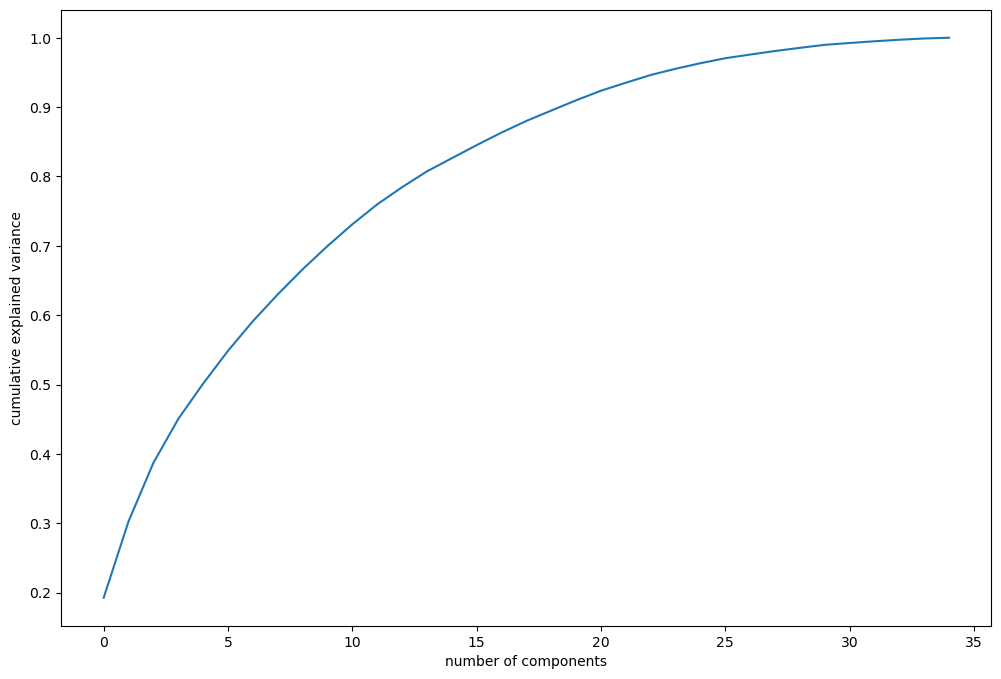

In [294]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [295]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(n_components=15, random_state=42)

In [296]:
X_train_pca = pca.fit_transform(X_train)
X_train_pca.shape


(14809, 15)

<AxesSubplot:>

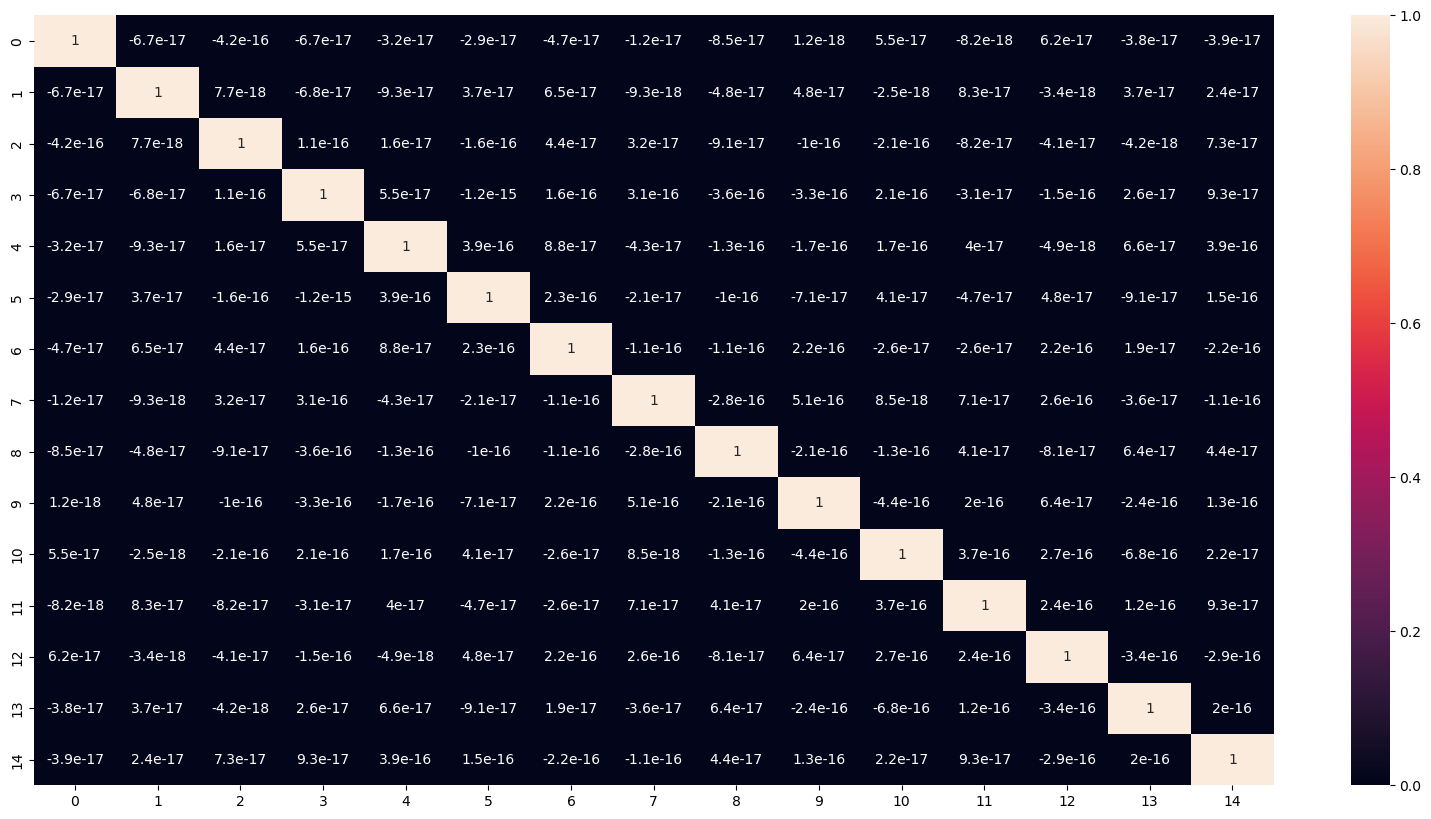

In [297]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(np.corrcoef(X_train_pca.transpose()), annot=True)

In [298]:
#training the regression model
logsk = LogisticRegression(random_state=42)
model = logsk.fit(X_train_pca,y_train)

In [299]:
round(model.score(X_train_pca, y_train) * 100, 2)

92.76

In [300]:
X_test_pca = pca.transform(X_test)
X_test_pca.shape


(6348, 15)

In [301]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_train_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_df = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_df.head()

,1
0,0.036599
1,0.059887
2,0.077377
3,0.013647
4,0.000006


In [302]:
# Converting y_test to dataframe
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,Churn
28644,0
50902,0
50161,0
25341,0
13634,0


In [303]:
# Putting index
y_train_df['I'] = y_train_df.index
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)
# Appending y_train_df and y_pred_df
y_pred_final = pd.concat([y_train_df,y_pred_df], axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['I', 'Churn', 'Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,I,Churn,Churn_Prob
0,28644,0,0.036599
1,50902,0,0.059887
2,50161,0,0.077377
3,25341,0,0.013647
4,13634,0,0.000006


In [304]:
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,I,Churn,Churn_Prob,Predicted
0,28644,0,0.036599,0
1,50902,0,0.059887,0
2,50161,0,0.077377,0
3,25341,0,0.013647,0
4,13634,0,0.000006,0


In [305]:
for i in range(10):
    y_pred_final[i/10]= y_pred_final.Churn_Prob.map(lambda x: 1 if (x > (i/10)) else 0)
y_pred_final.head()

,I,Churn,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,28644,0,0.036599,0,1,0,0,0,0,0,0,0,0,0
1,50902,0,0.059887,0,1,0,0,0,0,0,0,0,0,0
2,50161,0,0.077377,0,1,0,0,0,0,0,0,0,0,0
3,25341,0,0.013647,0,1,0,0,0,0,0,0,0,0,0
4,13634,0,0.000006,0,1,0,0,0,0,0,0,0,0,0


In [306]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.Predicted)
confusion


array([[13356,   195],
       [  877,   381]])

In [307]:
##Let's check the overall accuracy.
round(metrics.accuracy_score(y_pred_final.Churn, y_pred_final.Predicted), 4) * 100


92.75999999999999

In [308]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [309]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN), 4) * 100

30.29

In [310]:
# Let us calculate specificity
round(TN / float(TN+FP), 4) * 100

98.56

In [311]:
# Calculate false postive rate - predicting churn when customer does not have churned
round(FP/ float(TN+FP), 4) * 100

1.44

In [312]:
# positive predictive value 
round(TP / float(TP+FP), 4)* 100

66.14999999999999

In [313]:
# Negative predictive value
round(TN / float(TN+ FN), 4) * 100

93.84

In [314]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

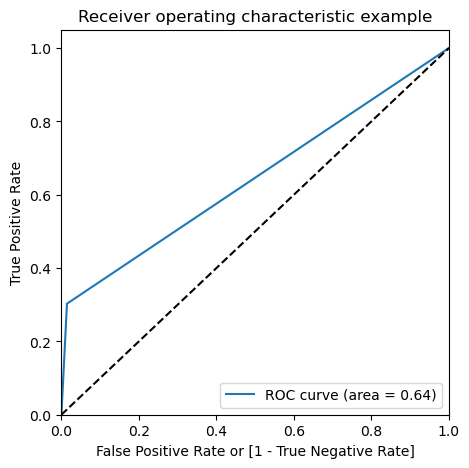

In [315]:
draw_roc(y_pred_final.Churn, y_pred_final.Predicted)

In [316]:
# Let's create cut off matrix based on different values we have calculated
from sklearn.metrics import precision_score, recall_score

cutoffmatrix_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity','Precision','Recall'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm))
    Accuracy = (cm[0,0] + cm[1,1]) / total1
    
    Specificity = cm[0,0] / (cm[0,0] + cm[0,1])
    Sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
    Precision = precision_score(y_pred_final.Churn, y_pred_final[i])
    Recall = recall_score(y_pred_final.Churn, y_pred_final[i])
    cutoffmatrix_df.loc[i] =[i, Accuracy, Sensitivity, Specificity, Precision, Recall]

cutoffmatrix_df

,Probability,Accuracy,Sensitivity,Specificity,Precision,Recall
0.0,0.0,0.084948,1.000000,0.000000,0.084948,1.000000
0.1,0.1,0.857519,0.775040,0.865176,0.347966,0.775040
0.2,0.2,0.916740,0.580286,0.947974,0.508711,0.580286
0.3,0.3,0.928692,0.475358,0.970777,0.601610,0.475358
0.4,0.4,0.928692,0.378378,0.979780,0.634667,0.378378
0.5,0.5,0.927612,0.302862,0.985610,0.661458,0.302862
0.6,0.6,0.925316,0.240064,0.988931,0.668142,0.240064
0.7,0.7,0.921939,0.163752,0.992325,0.664516,0.163752
0.8,0.8,0.919508,0.104928,0.995130,0.666667,0.104928
0.9,0.9,0.916132,0.021463,0.999188,0.710526,0.021463


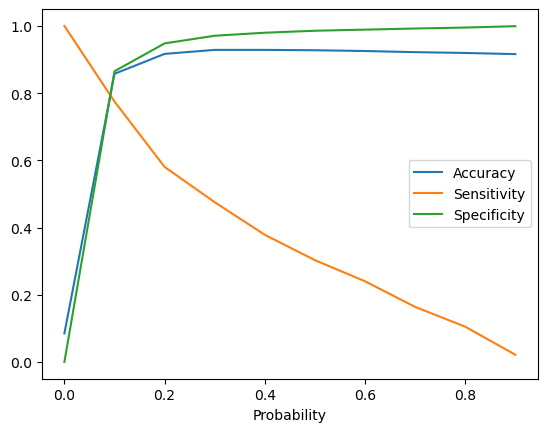

In [317]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoffmatrix_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

In [318]:
## 0.10 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_pred_final.head()


,I,Churn,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,28644,0,0.036599,0,1,0,0,0,0,0,0,0,0,0
1,50902,0,0.059887,0,1,0,0,0,0,0,0,0,0,0
2,50161,0,0.077377,0,1,0,0,0,0,0,0,0,0,0
3,25341,0,0.013647,0,1,0,0,0,0,0,0,0,0,0
4,13634,0,0.000006,0,1,0,0,0,0,0,0,0,0,0


In [319]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.Predicted)
confusion
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [320]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN), 4) * 100


77.5

In [321]:
# Negative predictive value
round(TN / float(TN+ FN), 4) * 100


97.64

In [322]:
##Let's check the overall accuracy.
round(metrics.accuracy_score(y_pred_final.Churn, y_pred_final.Predicted), 4) * 100

85.75

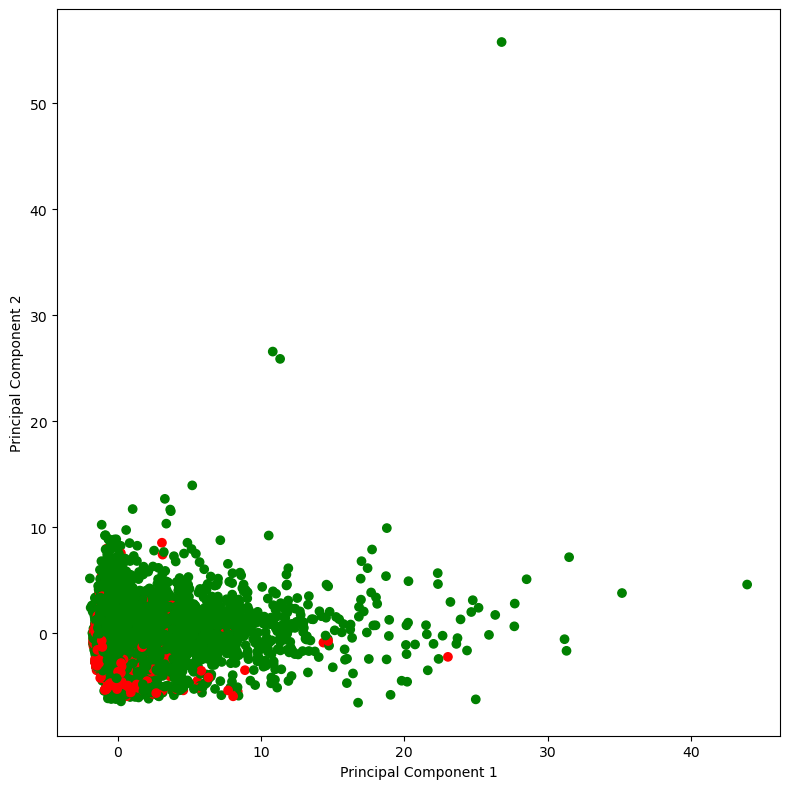

In [323]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [324]:
#PCA - Evaluation

In [325]:
X_test.head()

,arpu_6,arpu_7,total_og_mou_6,total_og_mou_7,total_ic_mou_6,total_ic_mou_7,last_day_rch_amt_6,last_day_rch_amt_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,total_rech_6,total_rech_7,roam_any_6,roam_any_7,local_any_6,local_any_7,std_any_6,std_any_7,spl_any_6,spl_any_7,data_used_6,data_used_7
44132,3.235056,1.836207,3.504778,3.600184,-0.086951,-0.106160,-0.397283,-0.180253,-0.388143,-0.341619,-0.412304,-0.355481,-0.113088,-0.104179,-0.403373,-0.36657,-0.422603,-0.378981,-0.372023,-0.325956,-0.209912,-0.182698,-0.933070,1.002529,0.473601,-0.537457,-0.480844,0.173344,0.248913,0.379698,0.443603,0.536726,0.639771,-0.500363,-0.472591
42475,-0.075931,0.534358,0.026800,0.901607,1.562194,1.888891,0.831079,1.104833,-0.388143,-0.341619,-0.412304,-0.355481,-0.113088,-0.104179,-0.403373,-0.36657,-0.422603,-0.378981,-0.372023,-0.325956,-0.209912,-0.182698,1.886303,-0.309490,-0.121867,1.860614,2.079679,0.173344,0.248913,0.379698,0.443603,0.536726,0.639771,-0.500363,-0.472591
23864,-0.329311,-0.446917,-0.212174,-0.466401,-0.598910,-0.564666,-0.534531,0.172362,-0.388143,-0.341619,-0.412304,-0.355481,-0.113088,-0.104179,-0.403373,-0.36657,-0.026807,0.008691,-0.372023,-0.325956,-0.209912,-0.182698,-0.450437,-0.452181,-0.409855,-0.537457,-0.480844,0.173344,0.248913,0.379698,0.443603,0.536726,0.639771,-0.500363,-0.472591
41783,-0.051164,-0.207669,0.610294,0.071714,-0.437317,-0.479648,0.014458,-0.689586,-0.388143,-0.341619,-0.411162,-0.355481,-0.113088,-0.104179,-0.403373,-0.36657,-0.026807,-0.378981,-0.372023,-0.325956,-0.209912,-0.182698,-0.520581,-0.267049,-0.424946,-0.537457,2.079679,0.173344,0.248913,0.379698,0.443603,0.536726,0.639771,-0.489174,-0.472591
57304,-0.755617,-0.933951,-0.944789,-0.827865,-0.812448,-0.783585,-0.740401,-0.689586,0.810642,-0.341619,0.934016,-0.355481,-0.113088,-0.104179,-0.403373,-0.36657,-0.422603,-0.378981,1.293421,-0.325956,-0.209912,-0.182698,-0.520581,-0.480719,-0.636221,-0.537457,-0.480844,-5.768890,-4.017468,-2.633672,-2.254268,-1.863147,-1.563059,-0.484805,-0.472591


In [326]:
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(6348, 15)

In [327]:
y_test.head()

44132    0
42475    0
23864    0
41783    1
57304    1
Name: Churn, dtype: int64

In [328]:
# Making prediction on the test data
pred_prob_test = model.predict_proba(X_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_prob_test))

'0.89'

In [329]:
# Predicted test probabilities
y_test_pred = logsk.predict_proba(X_test_pca)
# Converting y_test_pred to a dataframe which is an array
y_test_pred_df = pd.DataFrame(y_test_pred)
# Converting to column dataframe
y_test_pred_df = y_test_pred_df.iloc[:,[1]]
# Let's see the head
y_test_pred_df.head()


,1
0,0.055303
1,0.014179
2,0.042638
3,0.281052
4,0.566157


In [330]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()
# Putting 'I' to index
y_test_df['I'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_test_pred_df
y_test_pred_final = pd.concat([y_test_df,y_test_pred_df], axis=1)
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(['I', 'Churn', 'Churn_Prob'], axis=1)
# Let's see the head of y_test_pred_final
y_test_pred_final.head()
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_test_pred_final['Predicted'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.10 else 0)
# Let's see the head
y_test_pred_final.head()

,I,Churn,Churn_Prob,Predicted
0,44132,0,0.055303,0
1,42475,0,0.014179,0
2,23864,0,0.042638,0
3,41783,1,0.281052,1
4,57304,1,0.566157,1


In [331]:
## Let's check the overall accuracy.
round(metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.Predicted), 4) * 100


85.87

In [332]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.Predicted )
confusion2

array([[5018,  799],
       [  98,  433]])

In [333]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [334]:
# Let's see the recall of our logistic regression model
round(TP / float(TP+FN), 4) * 100

81.54

In [335]:
#lets see what the precision looks like
round(TP / float(TP+FP), 4) * 100

35.15

In [336]:
## Let's get precision
round(precision_score(y_test_pred_final.Churn, y_test_pred_final.Predicted), 4) * 100

35.15

In [337]:
## Let's get recall
round(recall_score(y_test_pred_final.Churn, y_test_pred_final.Predicted), 4) * 100

81.54

In [338]:
#Logistic Regression with RFE and VIF


In [339]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

import warnings
warnings.filterwarnings('ignore')

In [340]:
    X_train, X_test, y_train_log, y_test_log = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [341]:
## Scaling only features which are numeric
X_train[['arpu_6', 'arpu_7', 'total_og_mou_6', 'total_og_mou_7', 'total_ic_mou_6', 'total_ic_mou_7', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'arpu_3g_6', 'arpu_3g_7', 'arpu_2g_6', 'arpu_2g_7', 'night_pck_user_6', 'night_pck_user_7', 'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_6', 'sachet_2g_7', 'monthly_3g_6', 'monthly_3g_7', 'sachet_3g_6', 'sachet_3g_7', 'aon', 'total_rech_6', 'total_rech_7', 'roam_any_6', 'roam_any_7', 'local_any_6', 'local_any_7', 'std_any_6', 'std_any_7', 'spl_any_6', 'spl_any_7', 'data_used_6', 'data_used_7']] = scaler.fit_transform(X_train[['arpu_6', 'arpu_7', 'total_og_mou_6', 'total_og_mou_7', 'total_ic_mou_6', 'total_ic_mou_7', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'arpu_3g_6', 'arpu_3g_7', 'arpu_2g_6', 'arpu_2g_7', 'night_pck_user_6', 'night_pck_user_7', 'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_6', 'sachet_2g_7', 'monthly_3g_6', 'monthly_3g_7', 'sachet_3g_6', 'sachet_3g_7', 'aon', 'total_rech_6', 'total_rech_7', 'roam_any_6', 'roam_any_7', 'local_any_6', 'local_any_7', 'std_any_6', 'std_any_7', 'spl_any_6', 'spl_any_7', 'data_used_6', 'data_used_7']])
X_test[['arpu_6', 'arpu_7', 'total_og_mou_6', 'total_og_mou_7', 'total_ic_mou_6', 'total_ic_mou_7', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'arpu_3g_6', 'arpu_3g_7', 'arpu_2g_6', 'arpu_2g_7', 'night_pck_user_6', 'night_pck_user_7', 'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_6', 'sachet_2g_7', 'monthly_3g_6', 'monthly_3g_7', 'sachet_3g_6', 'sachet_3g_7', 'aon', 'total_rech_6', 'total_rech_7', 'roam_any_6', 'roam_any_7', 'local_any_6', 'local_any_7', 'std_any_6', 'std_any_7', 'spl_any_6', 'spl_any_7', 'data_used_6', 'data_used_7']] = scaler.transform(X_test[['arpu_6', 'arpu_7', 'total_og_mou_6', 'total_og_mou_7', 'total_ic_mou_6', 'total_ic_mou_7', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'arpu_3g_6', 'arpu_3g_7', 'arpu_2g_6', 'arpu_2g_7', 'night_pck_user_6', 'night_pck_user_7', 'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_6', 'sachet_2g_7', 'monthly_3g_6', 'monthly_3g_7', 'sachet_3g_6', 'sachet_3g_7', 'aon', 'total_rech_6', 'total_rech_7', 'roam_any_6', 'roam_any_7', 'local_any_6', 'local_any_7', 'std_any_6', 'std_any_7', 'spl_any_6', 'spl_any_7', 'data_used_6', 'data_used_7']])


In [342]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()

In [343]:
from sklearn.feature_selection import RFE

rfe = RFE(logreg,step=20)

rfe = rfe.fit(X_train, y_train)

In [344]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('total_og_mou_6', False, 2),
 ('total_og_mou_7', True, 1),
 ('total_ic_mou_6', True, 1),
 ('total_ic_mou_7', True, 1),
 ('last_day_rch_amt_6', False, 2),
 ('last_day_rch_amt_7', True, 1),
 ('arpu_3g_6', False, 2),
 ('arpu_3g_7', False, 2),
 ('arpu_2g_6', True, 1),
 ('arpu_2g_7', True, 1),
 ('night_pck_user_6', False, 2),
 ('night_pck_user_7', False, 2),
 ('monthly_2g_6', False, 2),
 ('monthly_2g_7', False, 2),
 ('sachet_2g_6', False, 2),
 ('sachet_2g_7', True, 1),
 ('monthly_3g_6', False, 2),
 ('monthly_3g_7', True, 1),
 ('sachet_3g_6', False, 2),
 ('sachet_3g_7', False, 2),
 ('aon', True, 1),
 ('total_rech_6', False, 2),
 ('total_rech_7', True, 1),
 ('roam_any_6', True, 1),
 ('roam_any_7', True, 1),
 ('local_any_6', False, 2),
 ('local_any_7', True, 1),
 ('std_any_6', False, 2),
 ('std_any_7', False, 2),
 ('spl_any_6', False, 2),
 ('spl_any_7', False, 2),
 ('data_used_6', True, 1),
 ('data_used_7', True, 1)]

In [345]:
col = X_train.columns[rfe.support_]

print(col)

Index(['arpu_6', 'arpu_7', 'total_og_mou_7', 'total_ic_mou_6',
       'total_ic_mou_7', 'last_day_rch_amt_7', 'arpu_2g_6', 'arpu_2g_7',
       'sachet_2g_7', 'monthly_3g_7', 'aon', 'total_rech_7', 'roam_any_6',
       'roam_any_7', 'local_any_7', 'data_used_6', 'data_used_7'],
      dtype='object')


In [346]:
#Assessing with stats model


In [347]:
import statsmodels.api as sm

In [348]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                14809
Model:                            GLM   Df Residuals:                    14791
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.7
Date:                Wed, 02 Aug 2023   Deviance:                       5487.3
Time:                        22:57:00   Pearson chi2:                 1.28e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1901
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.7655      0.074    -50.858      0.000      -3.911      -3.620
arpu_6                 0.6515      0.062     10.464      0.000       0.529       0.774
arpu_7                -0.5337      0.146     -3.659      0.000      -0.820      -0.248
total_og_mou_7        -0.1087      0.069     -1.581      0.114      -0.244       0.026
total_ic_mou_6         0.3832      0.063      6.081      0.000       0.260       0.507
total_ic_mou_7        -1.3033      0.129    -10.125      0.000      -1.556      -1.051
last_day_rch_amt_7    -0.3579      0.074     -4.824      0.000      -0.503      -0.212
arpu_2g_6             -0.1397      0.071     -1.965      0.049      -0.279      -0.000
arpu_2g_7              0.4009      0.178      2.252      0.024       0.052       0.750
sachet_2g_7           -0.0570      0.096     -0.591      0.555      -0.246       0.132
monthly_3g_7          -0.1974      0.144     -1.374      0.169      -0.479       0.084
aon                   -0.3809      0.048     -7.930      0.000      -0.475      -0.287
total_rech_7          -0.7203      0.265     -2.716      0.007      -1.240      -0.200
roam_any_6            -0.3815      0.041     -9.217      0.000      -0.463      -0.300
roam_any_7             0.7021      0.032     21.714      0.000       0.639       0.766
local_any_7           -0.4513      0.025    -17.700      0.000      -0.501      -0.401
data_used_6            0.1739      0.075      2.334      0.020       0.028       0.320
data_used_7           -0.9886      0.144     -6.850      0.000      -1.271      -0.706
======================================================================================
"""

In [349]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [350]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,arpu_2g_7,6.76
1,arpu_7,4.15
9,monthly_3g_7,3.89
16,data_used_7,3.77
15,data_used_6,3.41
11,total_rech_7,3.38
6,arpu_2g_6,3.17
4,total_ic_mou_7,2.88
0,arpu_6,2.87
3,total_ic_mou_6,2.78


In [351]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [352]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})

y_train_pred_final['Converted_prob'] = y_train_pred

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Converted,Converted_prob,predicted
0,0,0.039115,0
1,0,0.084307,0
2,0,0.099363,0
3,0,0.023803,0
4,0,0.002072,0


In [353]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[13327   224]
 [  824   434]]


In [354]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.039115,0,1,0,0,0,0,0,0,0,0,0
1,0,0.084307,0,1,0,0,0,0,0,0,0,0,0
2,0,0.099363,0,1,0,0,0,0,0,0,0,0,0
3,0,0.023803,0,1,0,0,0,0,0,0,0,0,0
4,0,0.002072,0,1,0,0,0,0,0,0,0,0,0


In [355]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.084948  1.000000  0.000000
0.1   0.1  0.866635  0.806836  0.872187
0.2   0.2  0.914849  0.656598  0.938824
0.3   0.3  0.927882  0.571542  0.960962
0.4   0.4  0.931866  0.467409  0.974983
0.5   0.5  0.929232  0.344992  0.983470
0.6   0.6  0.926531  0.251192  0.989226
0.7   0.7  0.922885  0.173291  0.992473
0.8   0.8  0.920521  0.100159  0.996679
0.9   0.9  0.917077  0.030207  0.999410


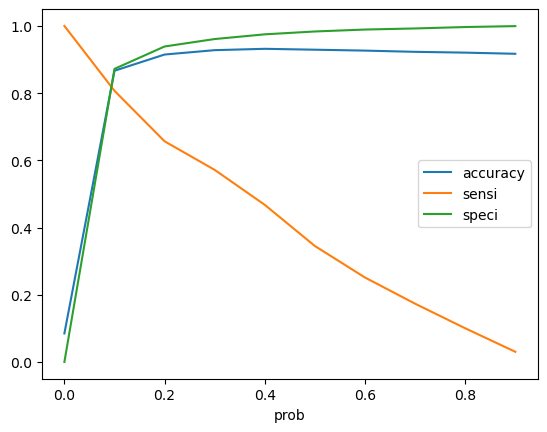

In [356]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [357]:
# Looking at the graph we can see that both specifitivity and sensitivity are high when the cut off is 0.1, 
# hence we will change it accordingly

In [358]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.039115,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.084307,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.099363,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.023803,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.002072,0,1,0,0,0,0,0,0,0,0,0,0


In [359]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2 

array([[11819,  1732],
       [  243,  1015]])

In [360]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [361]:
# Sensitivity of the model

In [362]:
TP/float(TP+FP)

0.36949399344739714

In [363]:
# Specificity of the model

In [364]:
TN / float(TN+FP)

0.872186554497823

In [365]:
# Precision of the model

In [366]:
TP / float(TP+FP)

0.36949399344739714

In [367]:
# Recall of the model

In [368]:
TP / float(TP+FN)

0.8068362480127186

In [369]:

#Decision Tree

In [370]:
from sklearn.tree import DecisionTreeClassifier

In [371]:
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [372]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      5817
           1       0.70      0.34      0.45       531

    accuracy                           0.93      6348
   macro avg       0.82      0.66      0.71      6348
weighted avg       0.92      0.93      0.92      6348



In [373]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[5742   75]
 [ 353  178]]
0.9325771896660365


In [ ]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

In [ ]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

In [ ]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# You can see that as we increase the value of max_depth, both training and test score increase till 
# about max-depth = 4, after which the test score gradually reduces. 
# Note that the scores are average accuracies across the 5-folds.
# Now we will tune Minimum samples leaf

In [ ]:
# GridSearchCV to find optimal min_samples_leafe
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# We can see that at values > 125, the test and train score starts to converge 
# and hence the model starts becoming more stable
# Now we will tune min_samples_split

In [ ]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#We notice that with values > 125, the train and test accuracy start to converge
# hence making the model more stable and less complex

In [ ]:
# Now we will be running the model with grid search to find the optimal hyper parameters

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

In [ ]:
    # printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

In [ ]:
# Running the model with the best parameters obtained from the grid search

In [ ]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=150,
                                  min_samples_split=200)
clf_gini.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
print("Precision Score",round(precision_score(y_test, clf_gini.predict(X_test[X_test.columns])),2))
print("Recall Score",round(recall_score(y_test, clf_gini.predict(X_test[X_test.columns])),2))

In [ ]:
# ADA boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

In [ ]:
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)
# fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)
y_trainpred = shallow_tree.predict(X_train)
metrics.accuracy_score(y_train, y_trainpred)


In [ ]:
# adaboost with the tree as base estimator

estimators = list(range(1, 50, 3))

abc_scores = []
for n_est in estimators:
    ABClassifier = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABClassifier.fit(X_train, y_train)
    y_pred = ABClassifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)

In [ ]:
# plot test scores and n_estimators
# plot
plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.85, 1])
plt.show()

In [ ]:
## Based on above grah it looks like 13 trees are giving maximum accuracy. Let's have a random forest model

In [ ]:
ABClassifier = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = 13)
    
ABClassifier.fit(X_train, y_train)
y_pred = ABClassifier.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

In [ ]:
print("Precision Score",round(precision_score(y_test, ABClassifier.predict(X_test[X_test.columns])),2))
print("Recall Score",round(recall_score(y_test, ABClassifier.predict(X_test[X_test.columns])),2))

In [ ]:
# Importing classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
#Random Forest

In [ ]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with 13 trees
rfc = RandomForestClassifier(n_estimators=13)
rfc.fit(X_train,y_train)

In [ ]:
# Making predictions
predictions = rfc.predict(X_test)

# Importing classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

In [ ]:
# Grid search to find optimal parameters for Random Forests

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,12,16,20],
    'min_samples_leaf': range(10, 20, 30),
    'min_samples_split': range(10, 30, 50),
    'n_estimators': [5,10,15,20], 
    'max_features': [5, 10, 15]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
# Fitting the best model

In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=10, 
                             min_samples_split=10,
                             max_features=10,
                             n_estimators=10)

In [ ]:
# fit
rfc.fit(X_train,y_train)

In [ ]:
# predict
predictions = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
print("Precision Score",round(precision_score(y_test, rfc.predict(X_test[X_test.columns])),2))
print("Recall Score",round(recall_score(y_test, rfc.predict(X_test[X_test.columns])),2))

In [ ]:
## Conclusion

### We ran the following models and have summarized our findings in the table below -

#    - Princple component Analysis and Regression
#    - Logistic Regression with RFE and VIF
#    - Decision Tree
#    - ADA Boosting with Decision Tree
#    - Random Forest


#| Methodology| Test - Precision | Test - Recall |
#
#| PCA with regression | 35.15 | 81.54 |
#| Logistic Regression | 37 | 80 |
#| Decision Tree | 65 | 39 |
#| ADA Boosting with DT | 65 | 39 |
#| Random Forests | 71 | 44.0 |

#### We see that almost on all models the values are coming very similar to each other and more often than not there is a trade off between precision and recall

#### Since both the metrics are important, we feel that going ahead with Random forests

In [ ]:
# Feature Importance

In [ ]:
# predictors
features = X_train.columns
# feature_importance
importance = rfc.feature_importances_
# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
#print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

In [ ]:
#### feature list in modeling with VIF
vif

In [ ]:
# Recommendation
# We notice that the following 5 factors affect the churn rate considerably -
# 1) Total Incoming/Outgoing Minutes of usage in the July
# 2) Total Recharge in the July
# 3) Average revenue per user in July
# 4) Data pack(2g/3g usage and recharge)
# 5) Change in the Roaming and local calls.

# Also these metrics are inversely proportion to churn which means that we need to come up with 
# campaigns that would keep people engaged either via calls (incoming/outgoing) or on internet.
# One interesting thing to note here is that we see that a lot of people are hooked on 2G and hence are not churning.
# It presents us with a great opportunity that if shift these people from 2g to 3g then we have a greater chance of
# these people not churning. Hence discounts on 3G pack can be one of the popular maarketing campaigns

In [ ]:
# 7. Creating submission file

In [ ]:
sample= pd.read_csv('sample.csv')
sample.head()

In [ ]:
unseen = pd.read_csv('test.csv')
unseen.head()

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
imp = SimpleImputer()
scale = StandardScaler()
pca = pca
rfc = rfc

In [ ]:
#dropping dervied columns
drop_defined_cols=['total_rech_6', 'total_rech_7', 'roam_any_6', 'roam_any_7', 'local_any_6', 'local_any_7', 'std_any_6', 'std_any_7', 'spl_any_6', 'spl_any_7', 'data_used_6', 'data_used_7']
X_train.drop(drop_defined_cols,axis=1,inplace=True)

In [ ]:
pipe = Pipeline(steps = [('imputation',imp),
                         ('model',rfc)])

In [ ]:
pipe.fit(X_train[X_train.columns], y_train)

In [ ]:
submission_data = unseen.set_index('id')[X_train.columns]
submission_data.shape

In [ ]:
unseen['churn_probability'] = pipe.predict(submission_data)
output = unseen[['id','churn_probability']]
output.head()

In [ ]:
output.to_csv('submission.csv',index=False)